# Sumário

1. [**Instalação de Bibliotecas, Imports e Carregamento do Arquivo**](#1-instalação-de-bibliotecas-imports-e-carregamento-do-arquivo)
2. [**Base de Dados**](#2-base-de-dados)
3. [**Diagnóstico e Qualidade de Dados**](#3.-Diagnóstico-e-Qualidade-de-Dados)
    - 3.1 [Análise de Metadados e Falsos Nulos](#3.1-Análise-de-Metadados-e-Falsos-Nulos)
    - 3.2 [Identificação de Outliers de Duração](#3.2-Identificação-de-Outliers-de-Duração)
    - 3.3 [Distribuição de Runtime](#3.3-Distribuição-de-Runtime)
    - 3.4 [Relevância Estatística: Votos vs Nota](#3.4-Relevância-Estatística:-Votos-vs-Nota)
4. [**Panorama Geral**](#4.-Panorama-Geral)
    - 4.1 [Indicadores Chave de Performance (KPIs) em Dashboard Cards](#4.1-Indicadores-Chave-de-Performance-(KPIs)-em-Dashboard-Cards)
    - 4.2 [Top 10 Filmes Mais Populares até 2024](#4.2-Top-10-Filmes-Mais-Populares-até-2024)
    - 4.3 [Distribuição dos Gêneros dos Filmes](#43-distribuição-dos-gêneros-dos-filmes)
    - 4.4 [Distribuição Percentual de Filmes Adultos e Não Adultos](#44-distribuição-percentual-de-filmes-adultos-e-não-adultos)
5. [**Análise Temporal**](#5.-Análise-Temporal)
    - 5.1 [A Qualidade dos Filmes ao Longo do Tempo](#5.1-A-Qualidade-dos-Filmes-ao-Longo-do-Tempo)
    - 5.2 [Sazonalidade de Lançamentos (por mês)](#5.2-Sazonalidade-de-Lançamentos-(por-mês))
    - 5.3 [Evolução da Receita Total da Indústria Cinematográfica (1920-2024)](#5.3-Evolução-da-Receita-Total-da-Indústria-Cinematográfica-(1920-2024))
6. [**Segmentação de Mercado e Produção**](#6.-Segmentação-de-Mercado-e-Produção)
    - 6.1 [Contagem de Produtoras por Filme](#6.1-Contagem-de-Produtoras-por-Filme)
    - 6.2 [Produtoras com Mais Filmes Produzidos](#6.2-Produtoras-com-Mais-Filmes-Produzidos)
    - 6.3 [Análise da Receita por Quantidade de Produtoras](#6.3-Análise-da-Receita-por-Quantidade-de-Produtoras)
    - 6.4 [Top 15 Gêneros por Receita Total](#6.4-Top-15-Gêneros-por-Receita-Total)
    - 6.5 [Top 15 Países Produtores (por volume)](#6.5-Top-15-Países-Produtores-(por-volume))
    - 6.6 [Correlação entre Variáveis Financeiras e Popularidade](#6.6-Correlação-entre-Variáveis-Financeiras-e-Popularidade)
    - 6.7 [Duração x Popularidade]()
7. [**Análise Financeira**](#7.-Análise-Financeira)
    - 7.1 [Heatmap de ROI médio por década e gênero (top 8)](#7.1-Heatmap-de-ROI-médio-por-década-e-gênero-(top-8))
    - 7.2 [Orçamento vs Lucro](#7.2-Orçamento-vs-Lucro)

# 1. Instalação de Bibliotecas, Imports e Carregamento do Arquivo

In [25]:
# Instalação das bibliotecas necessárias
%pip install pandas --quiet
%pip install numpy --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator


In [27]:
# Lê o CSV que está na mesma pasta do notebook
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.9520,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.2410,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.6430,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.9320,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.0820,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353971,838574,"Friends of Mine: ""The Things That Scare Us""",0.000,0,Released,2021-06-03,0,6,False,NaN,...,"Friends of Mine: ""The Things That Scare Us""",Maxwell thinks about all the different things ...,0.6000,/5nBsAXzsTrr80WwLycDLOLL3pkA.jpg,NaN,Family,Hermit Thrush Productions,NaN,English,educational
1353972,838575,François le Champi,0.000,0,Released,1976-12-15,0,90,False,NaN,...,François le Champi,A young miller takes under her protection an o...,0.6030,/zdhmgkOhkrNg2MMoMd7kSCxQ2MU.jpg,NaN,"TV Movie, History, Drama","TF1, Telfrance",NaN,French,NaN
1353973,838576,Empty House,0.000,0,Released,1999-01-01,0,24,False,NaN,...,빈 집,Edited from video diary footages shot in one d...,0.6000,/zDB1D54ly7RtPifhSHHoY3JAbgl.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1353974,838577,"Friends of Mine: ""Canoe Trip""",0.000,0,Released,2021-06-03,0,6,False,NaN,...,"Friends of Mine: ""Canoe Trip""",When Maxwell goes on a canoe trip with his gra...,0.6530,/5nBsAXzsTrr80WwLycDLOLL3pkA.jpg,NaN,Family,Hermit Thrush Productions,Canada,English,"lake, grandfather, canoe, newfoundland and lab..."


# 2. Base de Dados

### Sobre
O presente projeto utiliza o dataset do **TMDB (The Movie Database)**, uma base que compila metadados de aproximadamente 1 milhão de obras cinematográficas. Armazenado em formato CSV, o arquivo possui 603.14 MB e estrutura composta por 24 colunas, incluindo variáveis como títulos, gêneros, orçamentos, receitas e índices de popularidade. Pela sua amplitude e profundidade histórica, a base é ideal para estudos de ciência de dados, análises de tendências de mercado e desenvolvimento de sistemas de recomendação.

### Importação da Base de Dados
O processo de importação da base de dados concluído com sucesso, sem inconsistências detectadas. 
Para fins de verificação e conferência da estrutura, apresentam-se abaixo os **cinco registros iniciais**.

In [3]:
# Mostrar as 5 primeiras linhas do DataFrame
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


# 3. Diagnóstico e Qualidade de Dados

In [4]:
print("\nResumo de Tipos de Dados:")
print(df.dtypes.value_counts())


Resumo de Tipos de Dados:
object     16
int64       5
float64     2
bool        1
Name: count, dtype: int64


## 3.1 Análise de Metadados e Falsos Nulos

### Análise de Nulos - Numérico
Verifica valores que não deveriam estar marcados com 0 e sim vazios, tendo em vista que, em finanças e duração, 0 geralmente significa 'dado não coletado'.


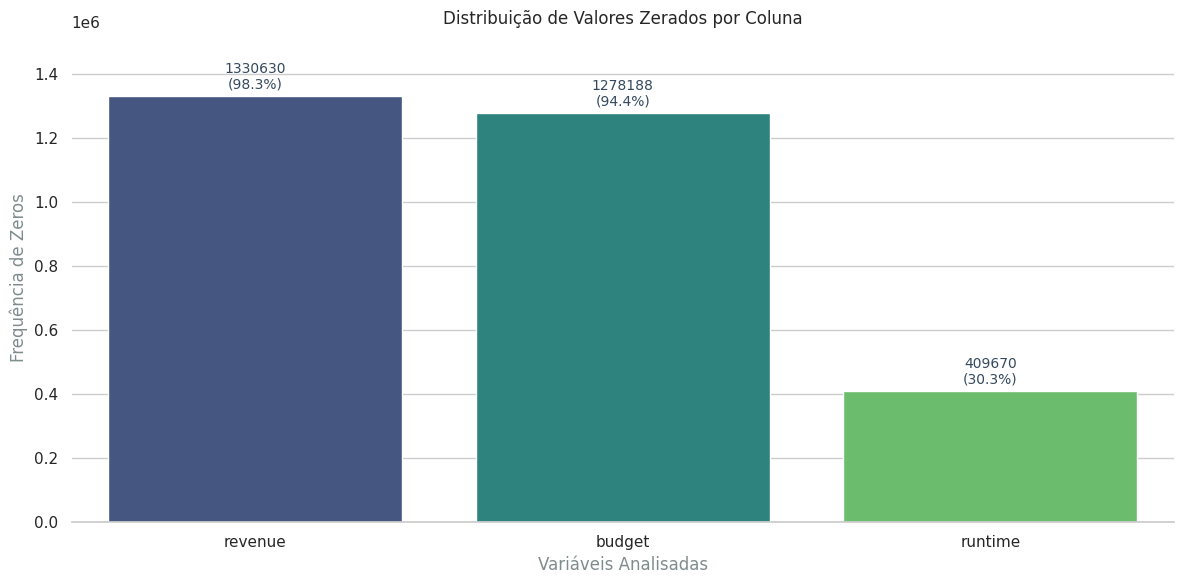

In [19]:
cols_zero = ['budget', 'revenue', 'runtime']

data = []
total = len(df)

for col in cols_zero:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        zeros = (df[col] == 0).sum()
        pct = (zeros / total) * 100
        data.append({
            'coluna': col,
            'zeros': zeros,
            'percentual': pct
        })

zeros_df = pd.DataFrame(data)
zeros_df = zeros_df.sort_values('zeros', ascending=False)

# Gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=zeros_df, 
    x='coluna', 
    y='zeros', 
    hue='coluna',      
    palette="viridis", 
    legend=False,      
    linewidth=1
)

plt.title('Distribuição de Valores Zerados por Coluna')
plt.xlabel('Variáveis Analisadas', fontsize=12, color='#7f8c8d')
plt.ylabel('Frequência de Zeros', fontsize=12, color='#7f8c8d')

# Remoção de bordas
sns.despine(left=True, bottom=False)

for i, row in enumerate(zeros_df.itertuples()):
    ax.text(
        i, 
        row.zeros + (zeros_df['zeros'].max() * 0.01), 
        f"{row.zeros}\n({row.percentual:.1f}%)", 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='#34495e'
    )

# Ajuste de margens e limites
plt.ylim(0, zeros_df['zeros'].max() * 1.15) 
plt.tight_layout()

plt.show()

### Análise de Nulos - Strings
Verifica colunas que deveriam ter conteúdo mas podem estar vazias ou apenas com espaços


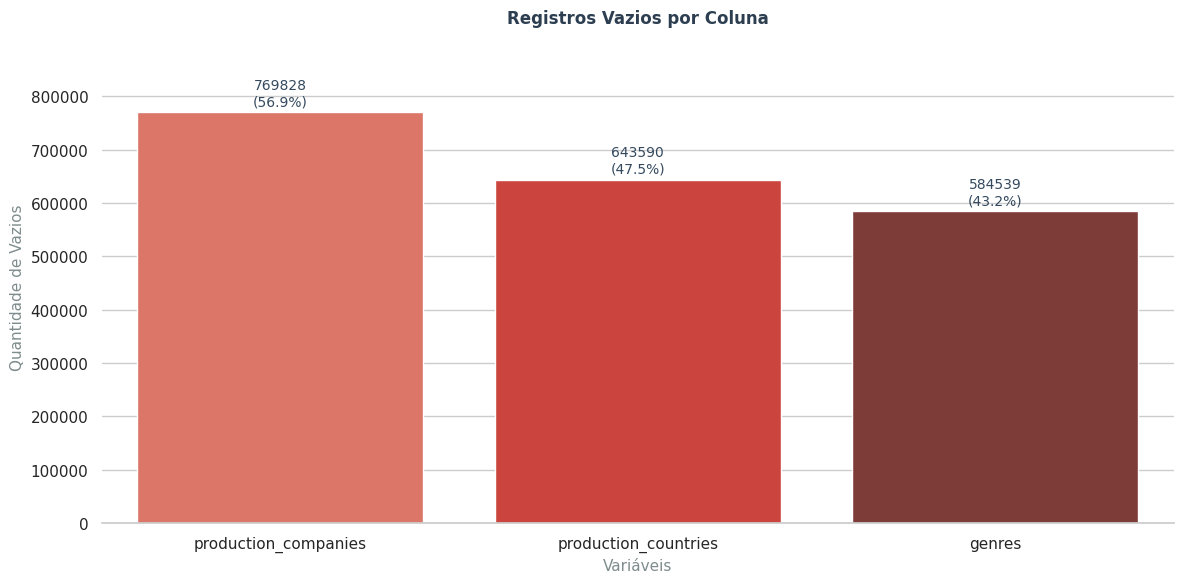

In [20]:
cols_list = ['genres', 'production_companies', 'production_countries']

data = []
total = len(df)

for col in cols_list:
    if col in df.columns:
        vazios = (
            df[col].isna().sum()
            + (df[col].astype(str).str.strip() == "").sum()
        )
        pct = (vazios / total) * 100
        data.append({
            'coluna': col,
            'vazios': vazios,
            'percentual': pct
        })

vazios_df = pd.DataFrame(data)
vazios_df = vazios_df.sort_values('vazios', ascending=False)

# Gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=vazios_df, 
    x='coluna', 
    y='vazios', 
    hue='coluna', 
    palette='Reds_d', 
    legend=False,
    linewidth=1
)

plt.title('Registros Vazios por Coluna', fontsize=12, fontweight='bold', pad=20, loc='center', color='#2c3e50')
plt.xlabel('Variáveis', fontsize=11, color='#7f8c8d')
plt.ylabel('Quantidade de Vazios', fontsize=11, color='#7f8c8d')

sns.despine(left=True, bottom=False)

for i, row in enumerate(vazios_df.itertuples()):
    ax.text(
        i, 
        row.vazios + (vazios_df['vazios'].max() * 0.01), 
        f"{row.vazios}\n({row.percentual:.1f}%)", 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='#34495e'
    )

plt.ylim(0, vazios_df['vazios'].max() * 1.15)
plt.tight_layout()

plt.show()


## 3.2 Identificação de Outliers de Duração

### Duplicidade de Filme
Busca encontrar filmes com mesmo título e data de lançamento para entender se há duplicidade na base;


 Verificação de Duplicidade Lógica:
 - Filmes com mesmo Título e Data de Lançamento: 3103 registros
   Exemplos de duplicados:
                  title release_date
2576             Mirage   2018-11-30
5094            Breathe   2017-10-13
6602           The Trip   2021-07-30
7155   On Deadly Ground   1994-02-18
7414     24: Redemption   2008-11-23
12599   Black Lightning   2009-12-28
13106     Metamorphosis   2019-08-21
13110              Riot   2015-09-27
13116        Save Ralph   2021-04-06
15203      On Your Mark   1995-07-15


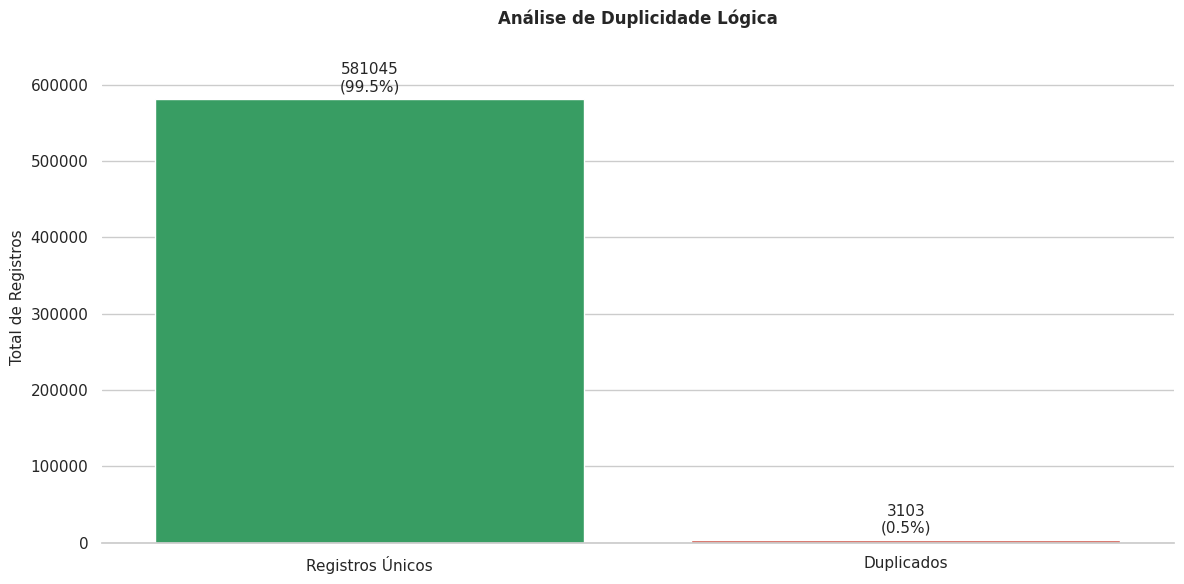

In [57]:
print("\n Verificação de Duplicidade Lógica:")
duplicados = df.duplicated(subset=['title', 'release_date'], keep=False).sum()
print(f" - Filmes com mesmo Título e Data de Lançamento: {duplicados} registros")
print("   Exemplos de duplicados:")
duplicados_df = df[df.duplicated(subset=['title', 'release_date'], keep=False)]
print(duplicados_df[['title', 'release_date']].drop_duplicates().head(10))



# Gráfico
total = len(df)
duplicados = df.duplicated(subset=['title', 'release_date'], keep=False).sum()
unicos = total - duplicados

dados_plot = pd.DataFrame({
    'Status': ['Registros Únicos', 'Duplicados'],
    'Quantidade': [unicos, duplicados],
    'Percentual': [(unicos/total)*100, (duplicados/total)*100]
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=dados_plot,
    x='Status',
    y='Quantidade',
    hue='Status',
    palette=['#27ae60', '#e74c3c'],
    legend=False
    )

plt.title('Análise de Duplicidade Lógica', fontsize=12, fontweight='bold', pad=20, loc='center')
plt.ylabel('Total de Registros', fontsize=11)
plt.xlabel('', fontsize=11)

sns.despine(left=True)

for i, row in enumerate(dados_plot.itertuples()):
    ax.text(
        i, 
        row.Quantidade + (total * 0.01), 
        f"{row.Quantidade}\n({row.Percentual:.1f}%)", 
        ha='center', 
        va='bottom',
        fontsize=11
    )

plt.ylim(0, total * 1.1)
plt.tight_layout()

plt.show()

### Análise de Datas e Status
Busca identificar filmes sem data de lançamento ou marcados como lançado mas com data futura.


Inconsistência de Datas e Status:
 - Filmes 'Lançados' com data futura: 73
 - Filmes sem nenhuma data: 283120


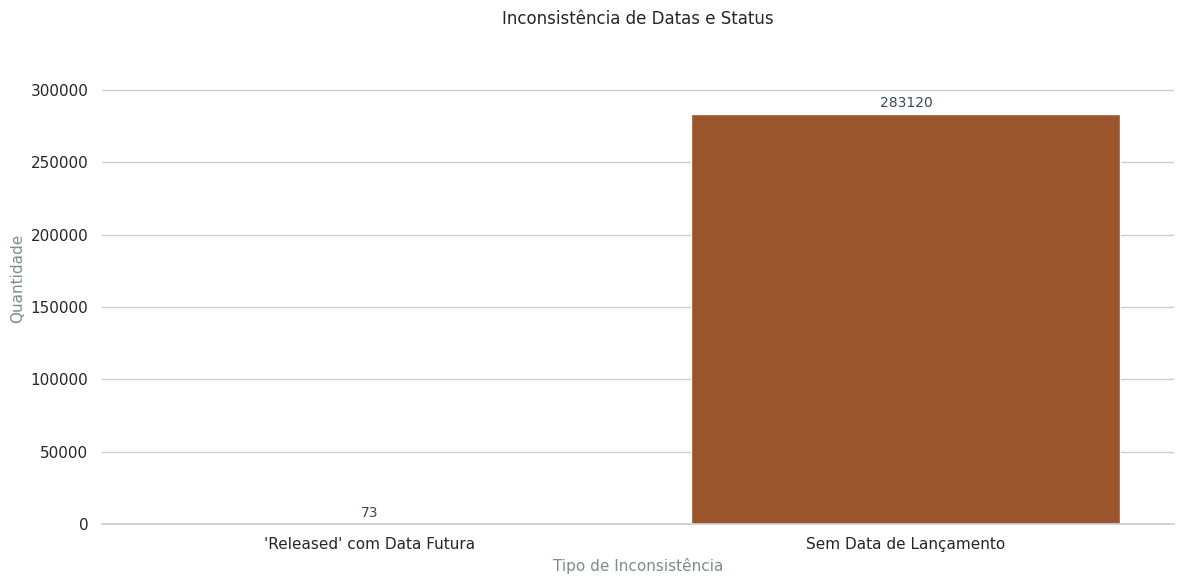

In [13]:
print("\nInconsistência de Datas e Status:")
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
hoje = pd.Timestamp.now()

futuros = df[(df['status'] == 'Released') & (df['release_date'] > hoje)].shape[0]
# Filmes sem data de lançamento
sem_data = df['release_date'].isna().sum()

print(f" - Filmes 'Lançados' com data futura: {futuros}")
print(f" - Filmes sem nenhuma data: {sem_data}")

# Gráfico
inconsistencias_df = pd.DataFrame({
    'Categoria': ["'Released' com Data Futura", "Sem Data de Lançamento"],
    'Quantidade': [futuros, sem_data]
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=inconsistencias_df,
    x='Categoria',
    y='Quantidade',
    hue='Categoria',
    palette='Oranges_d',
    legend=False,
    linewidth=1
)

plt.title('Inconsistência de Datas e Status')
plt.xlabel('Tipo de Inconsistência', fontsize=11, color='#7f8c8d')
plt.ylabel('Quantidade', fontsize=11, color='#7f8c8d')

sns.despine(left=True, bottom=False)

for i, row in enumerate(inconsistencias_df.itertuples()):
    ax.text(
        i, 
        row.Quantidade + (max(inconsistencias_df['Quantidade']) * 0.01), 
        f"{row.Quantidade}", 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='#34495e'
    )

plt.ylim(0, max(inconsistencias_df['Quantidade']) * 1.2)
plt.tight_layout()

plt.show()

### Placeholders
Identificação de termos comuns que indicam que o dado não existe de fato.



Análise de Qualidade de Texto (Overview):
 - Overviews com textos 'placeholder' (lixo): 20617


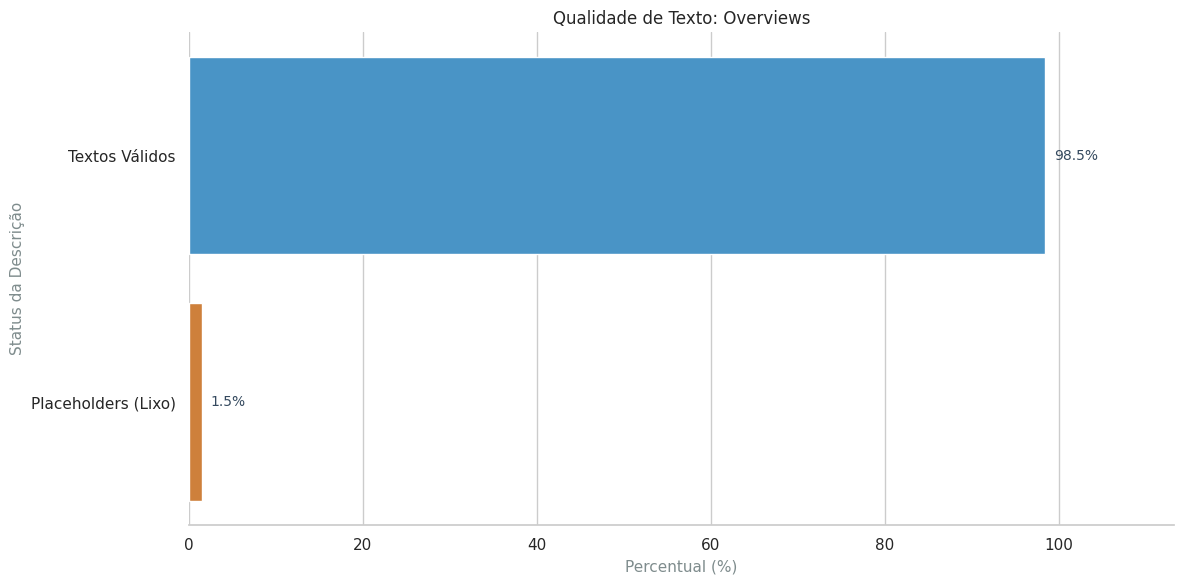

In [14]:
print("\nAnálise de Qualidade de Texto (Overview):")
termos_placeholder = ['no overview', 'tbd', 'n/a', 'add summary', 'no description', 'tba', 'to be determined', 'to be announced', 'not available', 'T.B.D', 'T.B.D.', 'T.B.A', 'unavailable', 'not available']
filtro_lixo = df['overview'].str.contains('|'.join(termos_placeholder), case=False, na=False)
qtd_lixo = filtro_lixo.sum()
print(f" - Overviews com textos 'placeholder' (lixo): {qtd_lixo}")

total_vias = len(df)
validos = total_vias - qtd_lixo

qualidade_df = pd.DataFrame({
    'Qualidade': ['Textos Válidos', 'Placeholders (Lixo)'],
    'Quantidade': [validos, qtd_lixo]
})
qualidade_df['Percentual'] = (qualidade_df['Quantidade'] / total_vias) * 100


# Gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=qualidade_df,
    x='Percentual',
    y='Qualidade',
    hue='Qualidade',
    palette=['#3498db', '#e67e22'],
    legend=False,
    linewidth=1
)

plt.title('Qualidade de Texto: Overviews')
plt.xlabel('Percentual (%)', fontsize=11, color='#7f8c8d')
plt.ylabel('Status da Descrição', fontsize=11, color='#7f8c8d')

sns.despine(left=True, bottom=False)

for i, v in enumerate(qualidade_df['Percentual']):
    ax.text(
        v + (qualidade_df['Percentual'].max() * 0.01), 
        i, 
        f'{v:.1f}%', 
        va='center',
        fontsize=10,
        color='#34495e'
    )

plt.xlim(0, qualidade_df['Percentual'].max() * 1.15)
plt.tight_layout()

plt.show()

## 3.3 Distribuição de Runtime

### Distribuição de Runtime por Intervalos
Esse gráfico objetiva entender o comportamento dos filmes em relação à duração e, assim, encontrar possíveis outliers. 

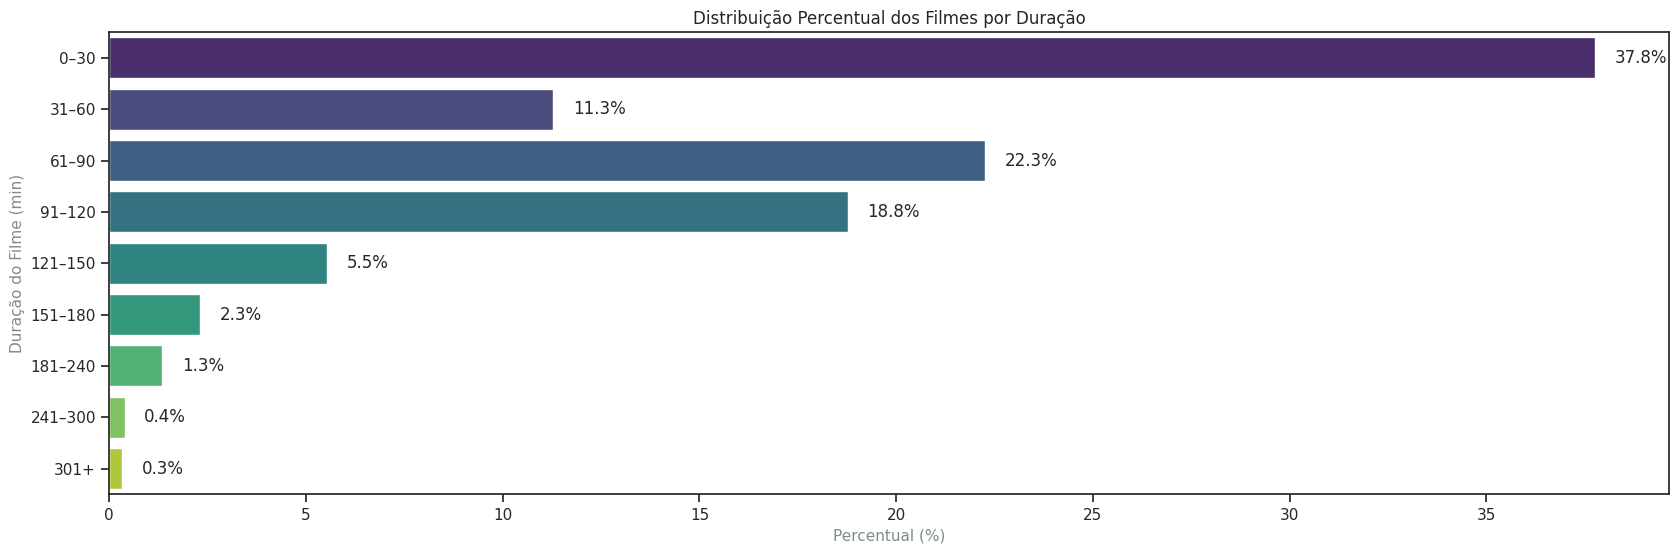

In [31]:
# Converte runtime para numérico
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df_limpo = df.dropna(subset=['runtime'])
df_limpo = df_limpo[(df_limpo['runtime'] >= 1) & (df_limpo['runtime'] <= 600)]

# Intervalos
bins = [0, 30, 60, 90, 120, 150, 180, 240, 300, 600]
labels = [
    '0–30', '31–60', '61–90', '91–120',
    '121–150', '151–180', '181–240',
    '241–300', '301+'
]

df_limpo['runtime_range'] = pd.cut(
    df_limpo['runtime'],
    bins=bins,
    labels=labels,
    right=True
)

# Contagem e percentual
runtime_counts = df_limpo['runtime_range'].value_counts().sort_index()
percentual = (runtime_counts / runtime_counts.sum()) * 100

plot_df = percentual.reset_index()
plot_df.columns = ['Intervalo (min)', 'Percentual']

# Gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.2, right=1.5)

ax = sns.barplot(
    data=plot_df,
    x='Percentual',
    y='Intervalo (min)',
    hue='Intervalo (min)',
    palette="viridis",
    legend=False
)

plt.title('Distribuição Percentual dos Filmes por Duração')
plt.xlabel('Percentual (%)', fontsize=11, color='#7f8c8d')
plt.ylabel('Duração do Filme (min)', fontsize=11, color='#7f8c8d')

# Rótulos
for i, v in enumerate(plot_df['Percentual']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.show()

### Distribuição de Runtime por Década
No gráfico abaixo, é avaliado se há uma diferença entre a duração dos filmes lançados em cada década, permitindo também a verificação e concentração dos possíveis outliers.

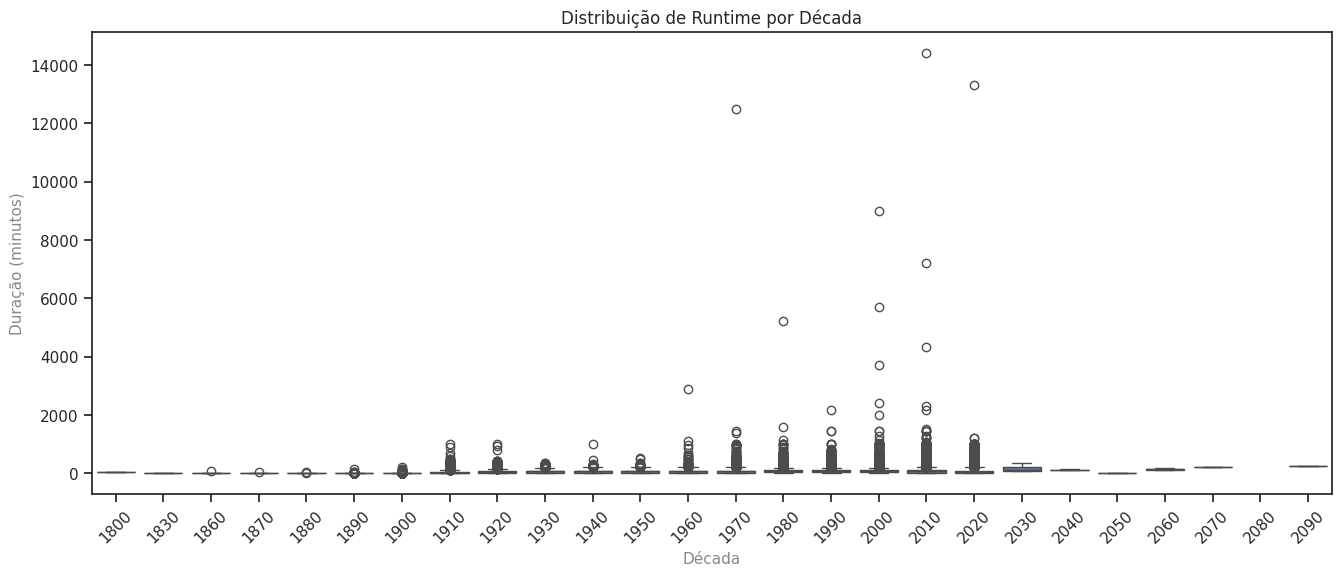

In [41]:
df['decade'] = (df['release_date'].dt.year // 10 * 10).dropna().astype(int).astype(str)

# Ordem das décadas
ordem_decadas = sorted(df['decade'].dropna().unique())

plt.figure(figsize=(16,6))

sns.boxplot(
    x='decade', 
    y='runtime', 
    data=df[df['runtime'] > 0], 
    order=ordem_decadas,
    legend=False
)

# Títulos e rótulos
plt.title('Distribuição de Runtime por Década')
plt.ylabel('Duração (minutos)', fontsize=11, color='#7f8c8d')
plt.xlabel('Década', fontsize=11, color='#7f8c8d')

plt.xticks(rotation=45)

plt.show()

## 3.4 Relevância Estatística: Votos vs Nota

### Identificação de Falsos Populares

Abaixo, faremos uma análise sobre os outliers, valores que podem ser erros ou exceções na base.

Como mostra o gráfico de dispersão abaixo, podemos concluir que múltiplos filmes da base de dados do IMDb estão com nota 10, porém sem nenhum voto, o que gera certa inconsistência nos dados. Para a camada silver, esses outliers serão retirados.

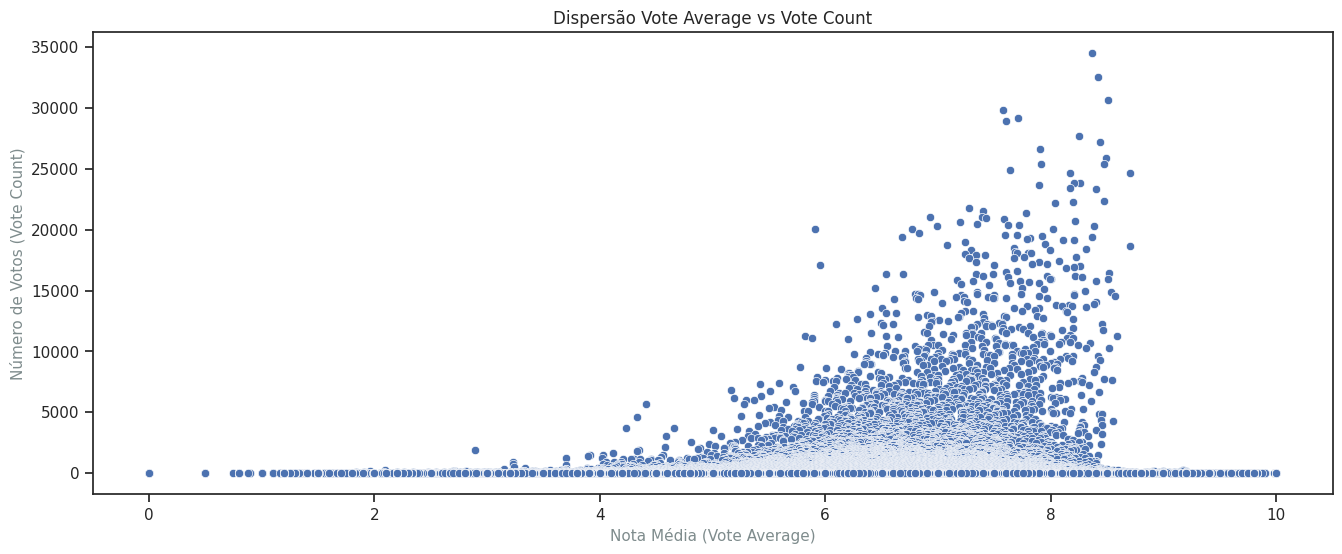

Possíveis outliers (poucos votos, nota alta):
                                                     title  vote_average  \
1352006                                     The Audition 9          10.0   
1340023                                Daddy Daughter Trip          10.0   
1332336  Jessico, Una Historia de Rock en Tiempos Convu...          10.0   
1330921                                            Transit          10.0   
1327944                                      Sunny Sisters          10.0   
1324907                                   Story of the Sea          10.0   
1198101                                           Close Up          10.0   
1183680                                    The Yellow Bike          10.0   
1170173                                           湘西剿匪记 上集          10.0   
1167629                                Gazo : Zénith Paris          10.0   

         vote_count  
1352006           0  
1340023           0  
1332336           0  
1330921           0  
1327944

In [32]:
# Converte para numérico e remove NaN
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df_limpo = df.dropna(subset=['vote_average', 'vote_count'])

# Gráfico de dispersão

sns.set_style('ticks')
plt.figure(figsize=(16,6))
sns.scatterplot(x='vote_average', y='vote_count', data=df_limpo)
plt.title('Dispersão Vote Average vs Vote Count')
plt.xlabel('Nota Média (Vote Average)', fontsize=11, color='#7f8c8d')
plt.ylabel('Número de Votos (Vote Count)', fontsize=11, color='#7f8c8d')
plt.show()

# Identificar possíveis outliers: filmes com poucos votos mas notas altas
outliers = df_limpo[(df_limpo['vote_count'] < 100) & (df_limpo['vote_average'] > 8)].sort_values('vote_average', ascending=False)
print("Possíveis outliers (poucos votos, nota alta):")
print(outliers[['title', 'vote_average', 'vote_count']].head(10))

## 4. Panorama Geral

### 4.1 Indicadores Chave de Performance (KPIs) em Dashboard Cards

Este gráfico apresenta um conjunto de Indicadores Chave de Performance (KPIs), facilitando a leitura de padrões e comparações relevantes.


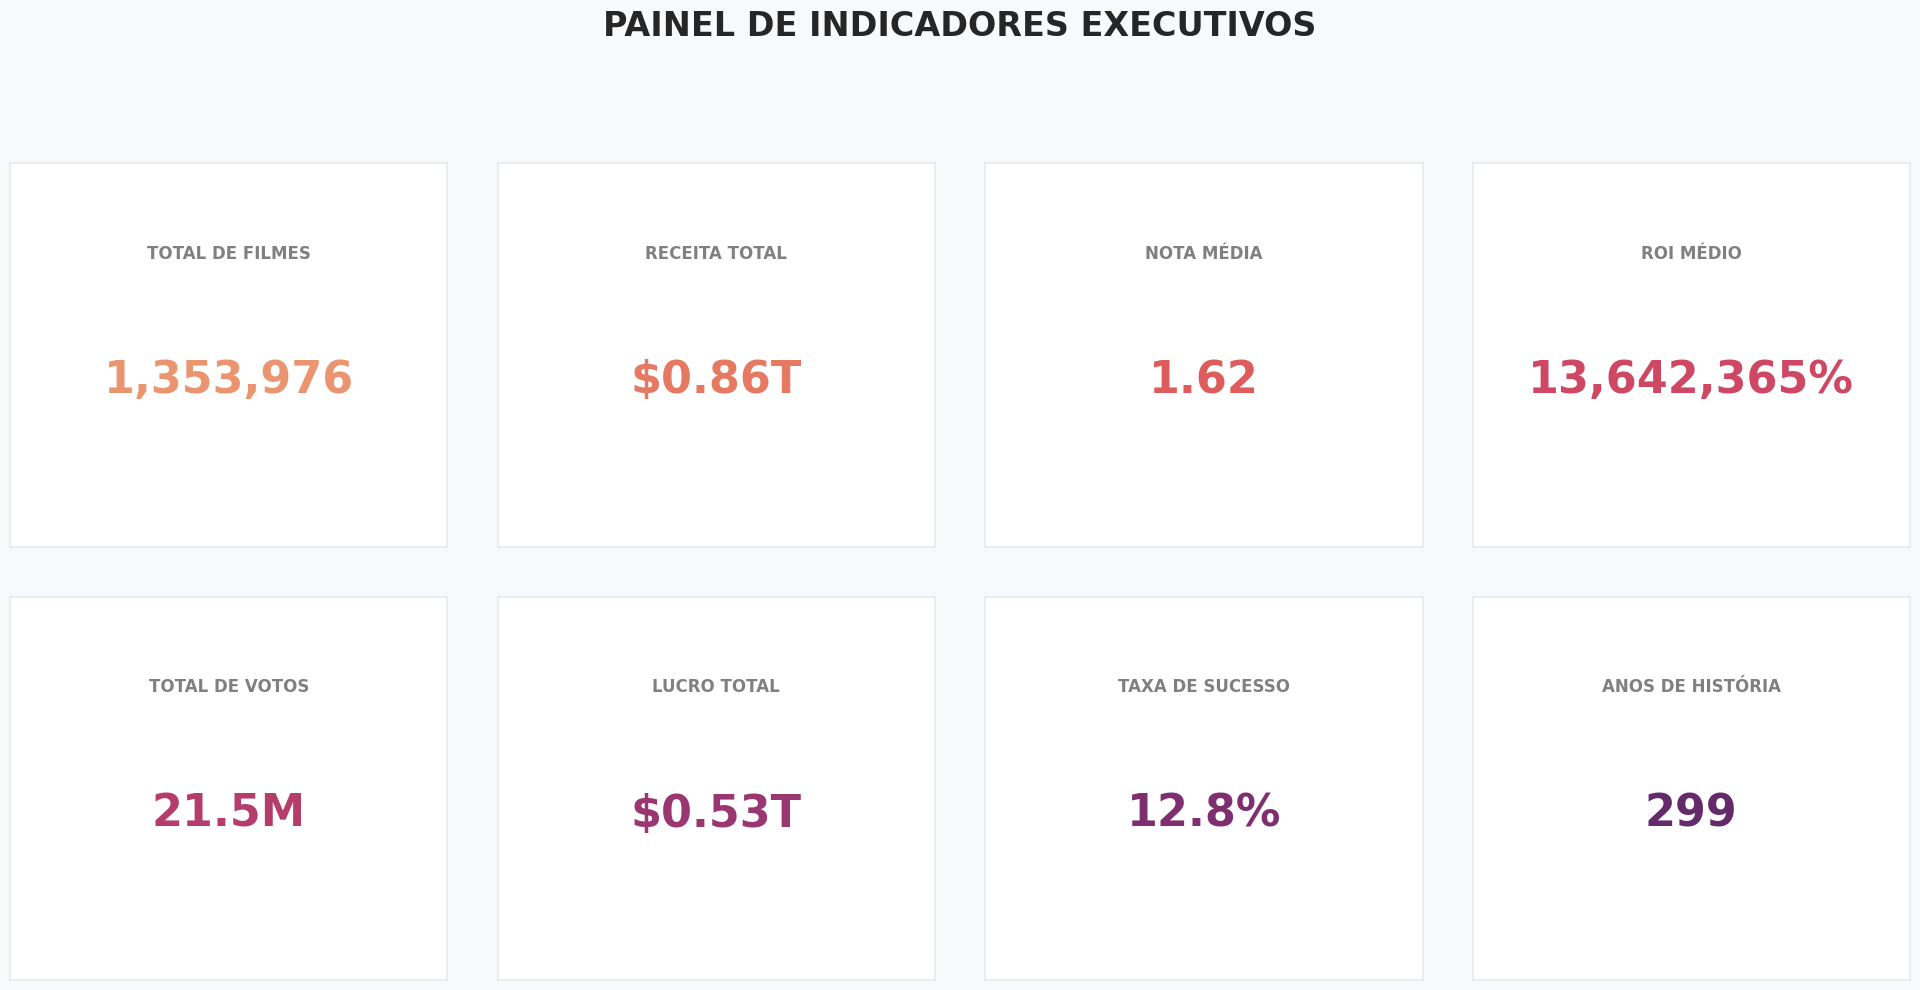

In [ ]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

data_min = pd.to_datetime(df['release_date'], errors='coerce').min()
data_max = pd.to_datetime(df['release_date'], errors='coerce').max()

# Cálculo dos KPIs
total_filmes = len(df)
receita_total = df['revenue'].sum()
lucro_total = receita_total - df['budget'].sum()
nota_media_geral = df['vote_average'].mean()
votos_totais = df['vote_count'].sum()

# ROI e Sucesso 
tem_budget = df[df['budget'] > 0]
roi_medio = ((tem_budget['revenue'] - tem_budget['budget']) / tem_budget['budget']).mean() * 100
taxa_sucesso = (len(tem_budget[tem_budget['revenue'] > tem_budget['budget']]) / len(tem_budget) * 100) if len(tem_budget) > 0 else 0
span_anos = int(data_max.year - data_min.year) if pd.notnull(data_max) else 0

# Gráfico
sns.set_theme(style="white")
cores = sns.color_palette("flare", 8)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_facecolor('#F8F9FA') 
fig.suptitle('PAINEL DE INDICADORES EXECUTIVOS', fontsize=24, fontweight='bold', y=1.02)

# Lista organizada
dados_kpi = [
    ('TOTAL DE FILMES', f'{total_filmes:,}'),
    ('RECEITA TOTAL', f'${receita_total/1e12:.2f}T'),
    ('NOTA MÉDIA', f'{nota_media_geral:.2f}'),
    ('ROI MÉDIO', f'{roi_medio:,.0f}%'),
    ('TOTAL DE VOTOS', f'{votos_totais/1e6:.1f}M'),
    ('LUCRO TOTAL', f'${lucro_total/1e12:.2f}T'),
    ('TAXA DE SUCESSO', f'{taxa_sucesso:.1f}%'),
    ('ANOS DE HISTÓRIA', f'{span_anos}')
]

for i, ax in enumerate(axes.flatten()):
    ax.set_facecolor('white')
    for s in ax.spines.values():
        s.set_visible(True)
        s.set_color('#E9ECEF')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Texto: Título (Cima) e Valor (Centro)
    ax.text(0.5, 0.75, dados_kpi[i][0], ha='center', fontsize=12, fontweight='bold', color='gray', transform=ax.transAxes)
    ax.text(0.5, 0.40, dados_kpi[i][1], ha='center', fontsize=32, fontweight='black', color=cores[i], transform=ax.transAxes)

plt.tight_layout(pad=3.0)
plt.show()

### 4.2 Top 10 Filmes Mais Populares até 2024

Abaixo estão os 10 filmes com **mais votos** no IMDb até 2024, refletindo a popularidade em relação aos votos do público, observe que a popularidade não está ligada diretamente a qualidade, já que vários filmes com notas menores, estão mais populares que filmes mais bem colocados no quesito técnico e de nota

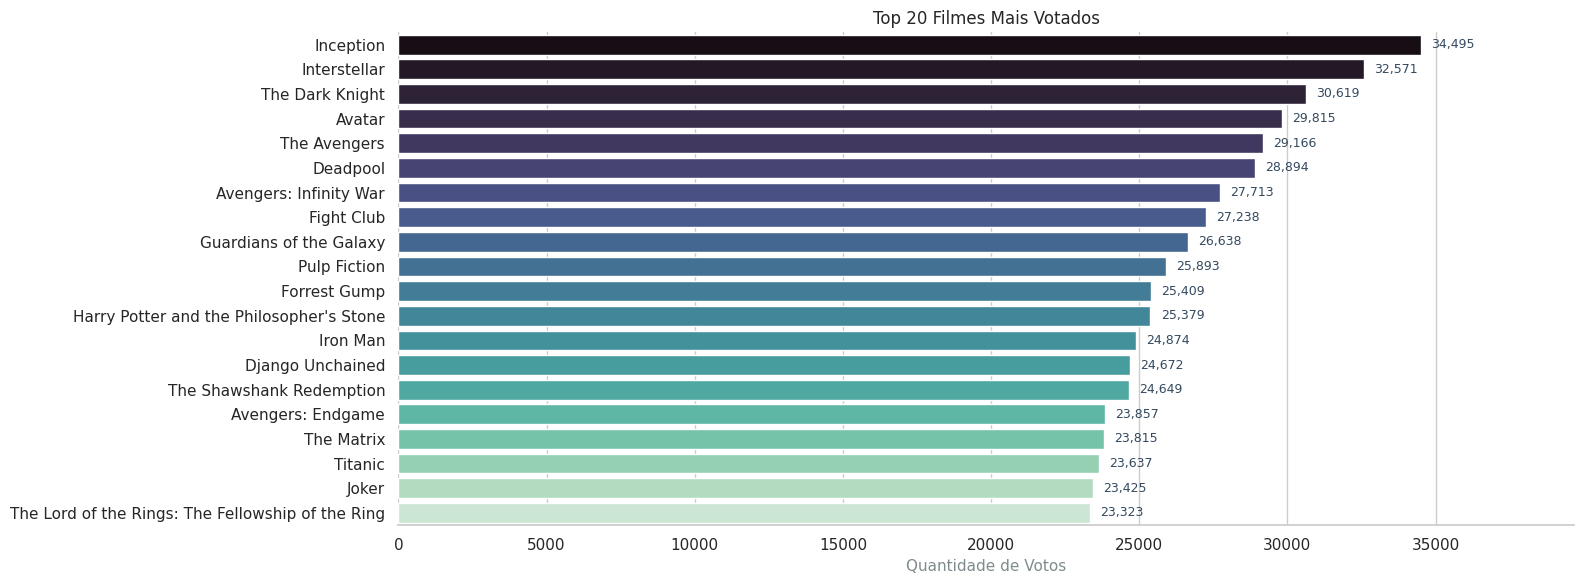

In [35]:
# Garante colunas numéricas
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
import matplotlib.pyplot as plt
import seaborn as sns

# Preparação dos dados
top_20 = (
    df.dropna(subset=['vote_count', 'title'])
      .sort_values('vote_count', ascending=False)
      .head(20)
)

# Configuração de Estilo
plt.figure(figsize=(16,6))

# Gráfico de barras horizontal para melhor leitura dos títulos dos filmes
ax = sns.barplot(
    data=top_20,
    x='vote_count',
    y='title',
    hue='title',
    palette='mako',
    legend=False,
    linewidth=1
)

# Título e Rótulos
plt.title('Top 20 Filmes Mais Votados')
plt.xlabel('Quantidade de Votos', fontsize=11, color='#7f8c8d')
plt.ylabel('', fontsize=11) 

# Remoção de bordas
sns.despine(left=True, bottom=False)

# Anotações
for i, v in enumerate(top_20['vote_count']):
    ax.text(
        v + (top_20['vote_count'].max() * 0.01), 
        i, 
        f'{int(v):,}', 
        va='center',
        fontsize=9,
        color='#34495e'
    )

plt.xlim(0, top_20['vote_count'].max() * 1.15)
plt.tight_layout()

plt.show()

### 4.3 Distribuição dos Gêneros dos filmes

O gráfico de pizza apresenta a distribuição dos gêneros cinematográficos presentes no dataset. Observa-se a predominância de alguns gêneros específicos, enquanto os demais aparecem com menor representatividade, evidenciando a diversidade de categorias na base analisada.

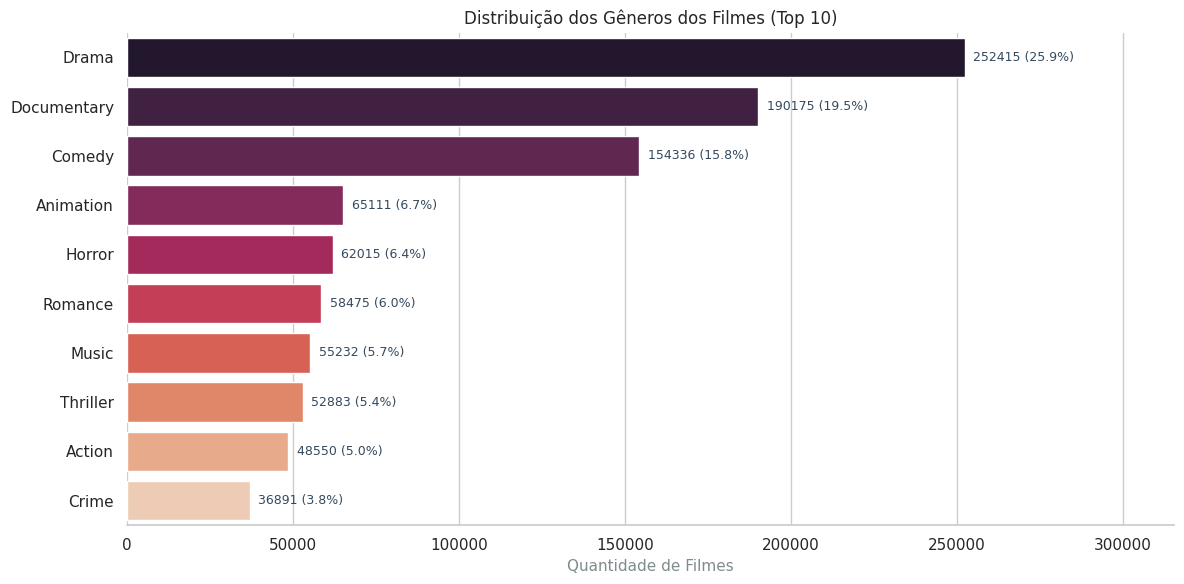

In [ ]:
# Remover valores nulos
df = df.dropna(subset=['genres'])

# Explora os gêneros 
generos = df['genres'].dropna().str.split(',').explode().str.strip()
contagem_generos = generos.value_counts().head(10).reset_index()
contagem_generos.columns = ['Gênero', 'Quantidade']
total_top_10 = contagem_generos['Quantidade'].sum()
contagem_generos['Percentual'] = (contagem_generos['Quantidade'] / total_top_10) * 100

plt.figure(figsize=(12,6))

# Gráfico de barras horizontal
ax = sns.barplot(
    data=contagem_generos,
    x='Quantidade',
    y='Gênero',
    hue='Gênero',
    palette='rocket',
    legend=False,
    linewidth=1
)

# Título e Rótulos
plt.title('Distribuição dos Gêneros dos Filmes (Top 10)')
plt.xlabel('Quantidade de Filmes', fontsize=11, color='#7f8c8d')
plt.ylabel('', fontsize=11)

# Remoção de bordas
sns.despine(left=True, bottom=False)

# Anotações (Quantidade + Percentual do Top 10)
for i, row in enumerate(contagem_generos.itertuples()):
    ax.text(
        row.Quantidade + (contagem_generos['Quantidade'].max() * 0.01), 
        i, 
        f'{int(row.Quantidade)} ({row.Percentual:.1f}%)', 
        va='center',
        fontsize=9,
        color='#34495e'
    )

plt.xlim(0, contagem_generos['Quantidade'].max() * 1.25)
plt.tight_layout()

plt.show()

# 4.4 Distribuição Percentual de Filmes Adultos e Não Adultos
Este gráfico de pizza apresenta a proporção de filmes classificados como adultos e não adultos no conjunto de dados analisado. A visualização permite compreender rapidamente a composição do acervo quanto à classificação de conteúdo, evidenciando a predominância de produções não adultas em relação às adultas. Essa análise é relevante para contextualizar o perfil do dataset e apoiar interpretações posteriores relacionadas à filtragem e segmentação dos dados.

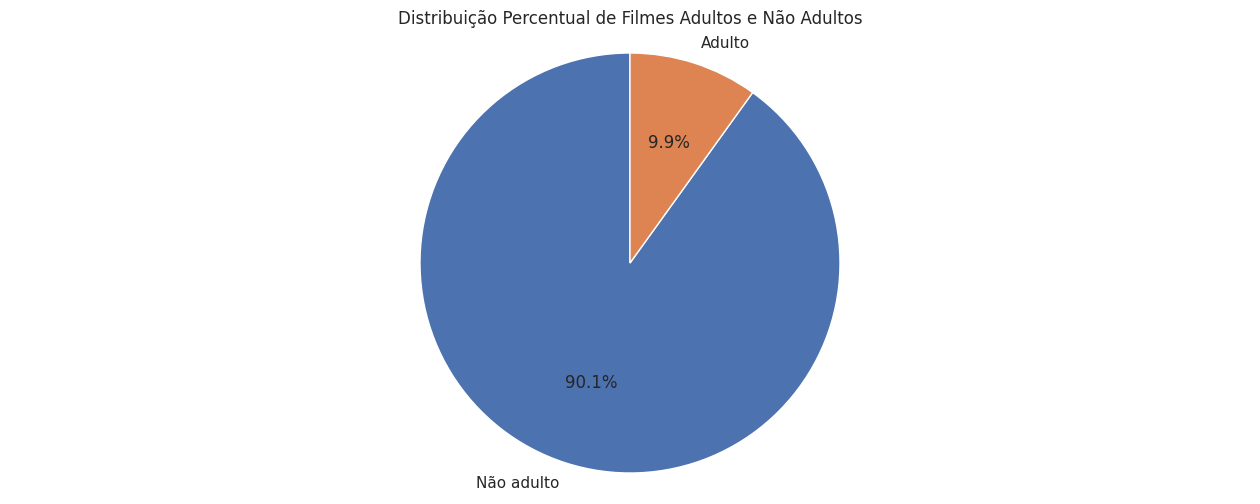

In [28]:
# Contagem de filmes adultos vs não adultos
counts = df['adult'].value_counts()
labels = ['Não adulto', 'Adulto']

# Gráfico pizza
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribuição Percentual de Filmes Adultos e Não Adultos')
plt.axis('equal')
plt.show()

## 5. Análise Temporal

### 5.1 A Qualidade dos Filmes ao Longo do Tempo

Será que a qualidade dos filmes melhorou com o passar das décadas, ou a qualidade geral cinematógráfica está decaindo? 
Obviamente o padrão de exigência do telespectador aumentou, pórem, será que mesmo com um aumento das avaliações, a média geral dos filmes se mantém?

Os gráficos abaixo indicam que filmes antigos tendiam a ter notas maiores. Isso se deve porque existiam menos lançamentos e provavelmente um número de outliers considerável, porém mesmo com essas observações pode se observar que a média dos filmes de 2000 até 2020 acontece uma certa estabilização da média, com exceção de um declinio que pode ser visto no meio do intervalo, algo próximo do ano de 2010. 


year
1895.0    3.528712
1896.0    2.891893
1897.0    2.294144
1898.0    2.116858
1899.0    2.705021
            ...   
2020.0    1.896193
2021.0    1.767387
2022.0    1.763530
2023.0    1.153694
2024.0    0.503015
Name: vote_average, Length: 130, dtype: float64


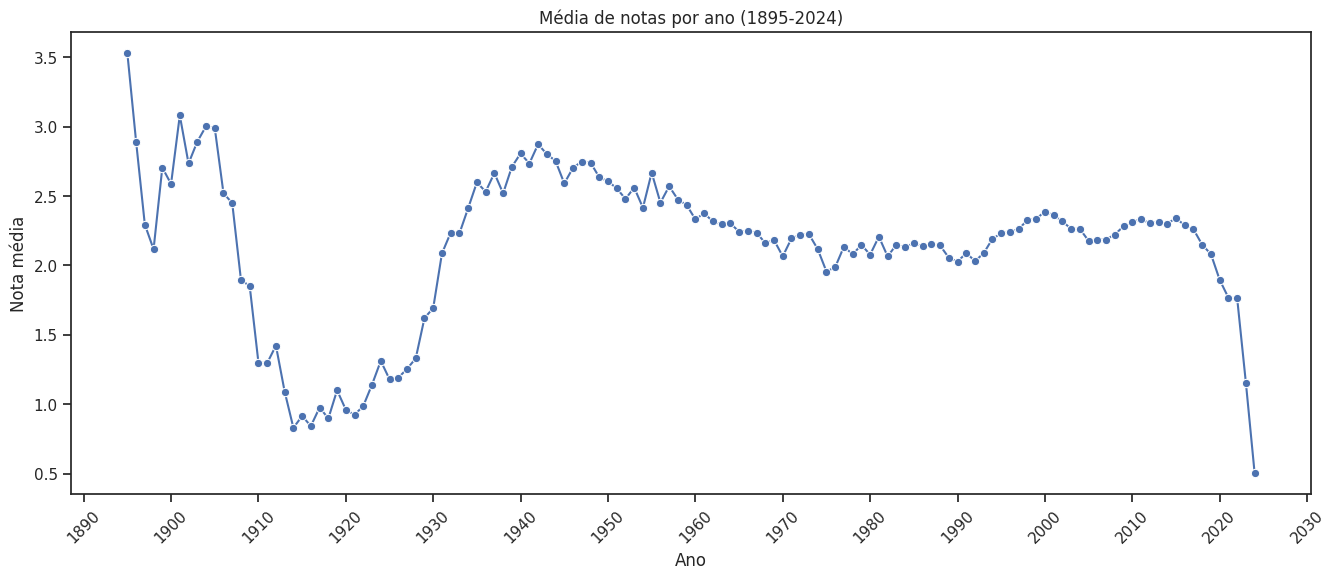

In [ ]:
# Recarrega o df para garantir dados limpos
df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Converte a coluna 'vote_average' para número, valores inválidos viram NaN, release_date para datetime
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Filtra anos de 1895 a 2024
df_limpo = df.dropna(subset=['year', 'vote_average'])
df_limpo = df_limpo[(df_limpo['year'] >= 1895) & (df_limpo['year'] <= 2024)]

media_por_ano = df_limpo.groupby('year')['vote_average'].mean().sort_index()
print(media_por_ano)

sns.set_style('ticks')

# Gráfico 
plt.figure(figsize=(16,6))
sns.lineplot(x=media_por_ano.index, y=media_por_ano.values, marker='o')
plt.title("Média de notas por ano (1895-2024)")
plt.xlabel("Ano")
plt.ylabel("Nota média")

# Configura os intervalos do eixo X para 10 em 10 anos
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=45)  

plt.show()

### 5.2 Sazonalidade de Lançamentos (por mês)

Este gráfico apresenta Sazonalidade de Lançamentos (por mês), facilitando a leitura de padrões e comparações relevantes.


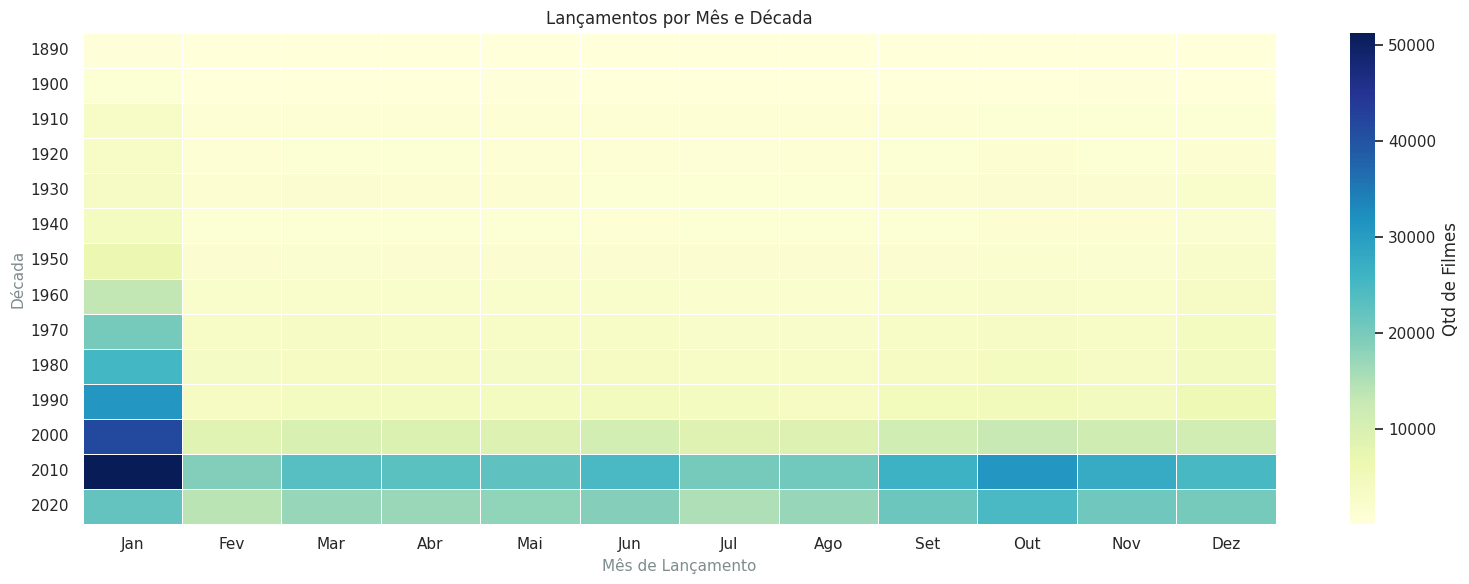

In [49]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_vendas = df[df['release_date'].notna()].copy()
df_vendas['month'] = df_vendas['release_date'].dt.month
df_vendas['decade'] = (df_vendas['release_date'].dt.year // 10 * 10).astype(int)
df_vendas= df_vendas[(df_vendas['year'] >= 1895) & (df_vendas['year'] <= 2024)]

# Matriz de contagem (Década vs Mês)
pivot_df = df_vendas.groupby(['decade', 'month']).size().unstack(fill_value=0)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
pivot_df.columns = meses


plt.figure(figsize=(16, 6))
sns.set_theme(style="white")

# Plotagem com Heatmap
ax = sns.heatmap(
    pivot_df, 
    annot=False,          
    cmap='YlGnBu',       
    cbar_kws={'label': 'Qtd de Filmes'},
    linewidths=.5
)

# Estilização conforme seu padrão
plt.title('Lançamentos por Mês e Década')
plt.xlabel('Mês de Lançamento', fontsize=11, color='#7f8c8d')
plt.ylabel('Década', fontsize=11, color='#7f8c8d')

# Ajuste de layout
plt.tight_layout()
plt.show()

### 5.3 Evolução da Receita Total da Indústria Cinematográfica (1920-2024)

Este gráfico apresenta Evolução da Receita Total da Indústria Cinematográfica (1920-2024).

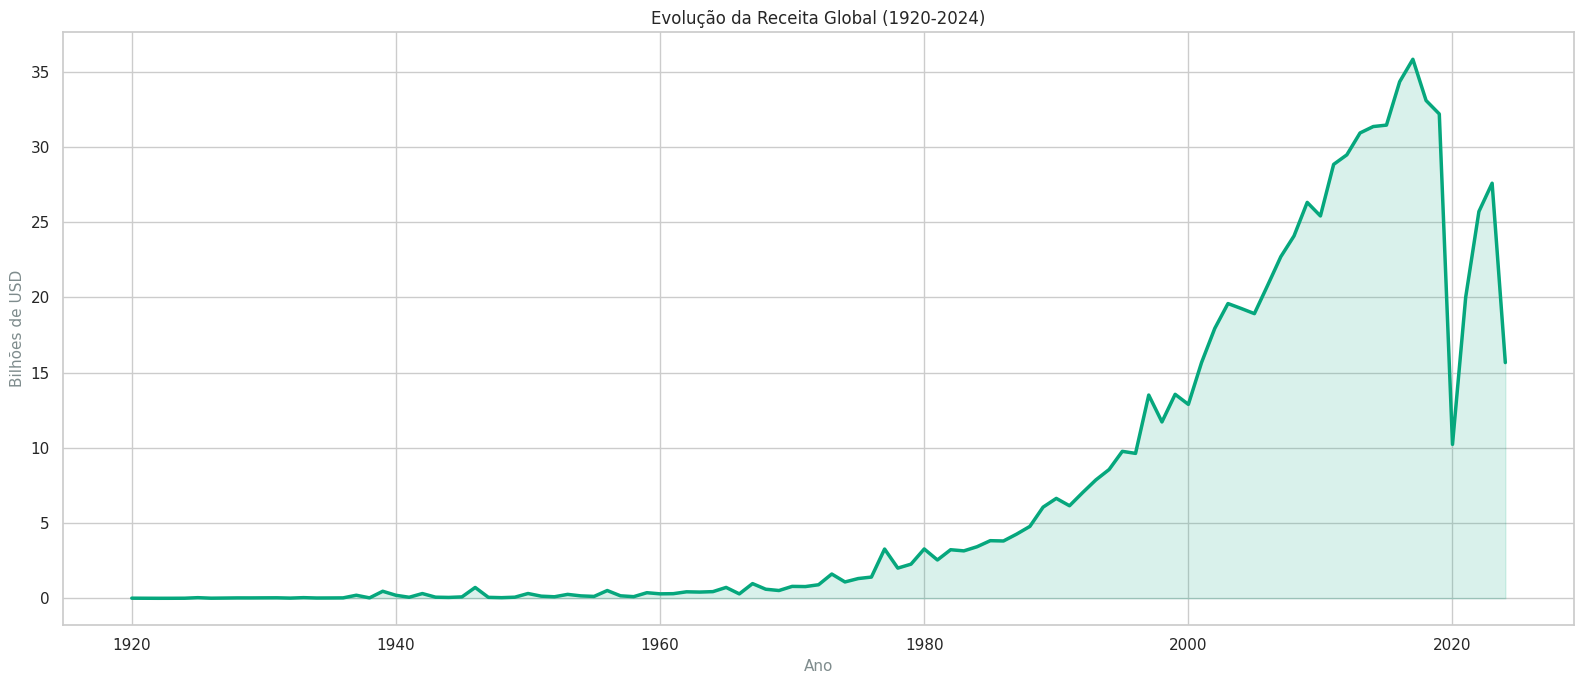

In [50]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

df_temporal = df[(df['year'] >= 1920) & (df['year'] <= 2024)].copy()
receita_por_ano = df_temporal.groupby('year')['revenue'].sum() / 1e9

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 7))

plt.plot(receita_por_ano.index, receita_por_ano.values, linewidth=2.5, color='#06A77D')
plt.fill_between(receita_por_ano.index, receita_por_ano.values, alpha=0.15, color='#06A77D')

plt.title('Evolução da Receita Global (1920-2024)',)
plt.xlabel('Ano', fontsize=11, color='#7f8c8d')
plt.ylabel('Bilhões de USD', fontsize=11, color='#7f8c8d')

plt.tight_layout()
plt.show()

##  6. Segmentação de Mercado e Produção

### 6.1 Contagem de Produtoras por Filme

Muitas vezes, filmes são produzidos por múltiplas produtoras. Abaixo, podemos ver a contagem de produtoras envolvidas na produção dos filmes.

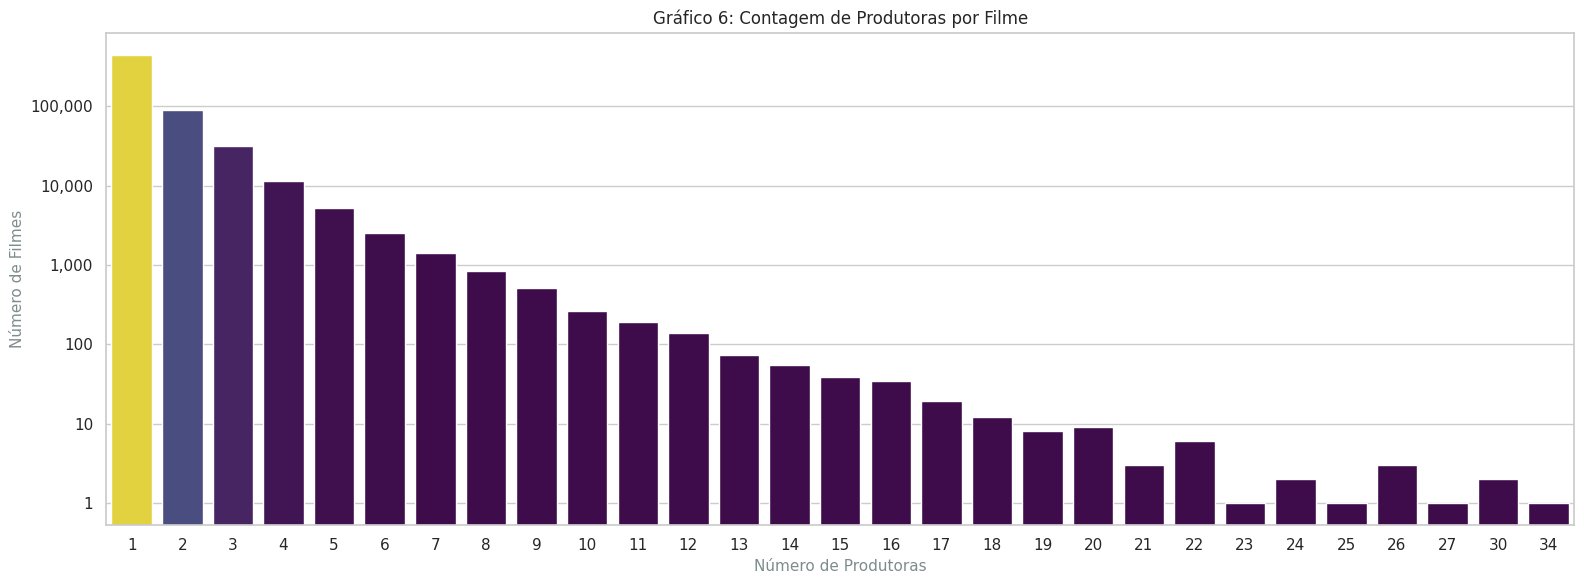

In [62]:
# Análise das Produtoras com Mais Filmes Produzidos

# Recarrega o df
#df = pd.read_csv('dados_brutos.csv', encoding='utf-8')

# Contagem de produtoras por filme
from collections import Counter
produtora_counter = Counter()

for produtoras in df['production_companies'].dropna():
    # Contar quantidade de produtoras no filme
    produtoras_list = produtoras.split(',')
    produtoras_count = len(produtoras_list)
    produtora_counter[produtoras_count] += 1

# Converte o Counter para DataFrame para facilitar a plotagem
produtora_df = pd.DataFrame.from_dict(produtora_counter, orient='index', columns=['Número de Filmes'])
produtora_df.index.name = 'Número de Produtoras'
produtora_df = produtora_df.sort_index()

# Plotagem
plt.figure(figsize=(16,6))
ax = sns.barplot(
    x=produtora_df.index, 
    y=produtora_df['Número de Filmes'], 
    palette="viridis", 
    hue=produtora_df['Número de Filmes'], 
    legend=False)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.title("Gráfico 6: Contagem de Produtoras por Filme")
plt.xlabel("Número de Produtoras", fontsize=11, color='#7f8c8d')
plt.ylabel("Número de Filmes", fontsize=11, color='#7f8c8d')

plt.tight_layout()
plt.show()

### 6.2 Produtoras com Mais Filmes Produzidos

O objetivo desta análise é identificar as produtoras que mais contribuíram para a indústria cinematográfica em termos de quantidade de filmes produzidos.

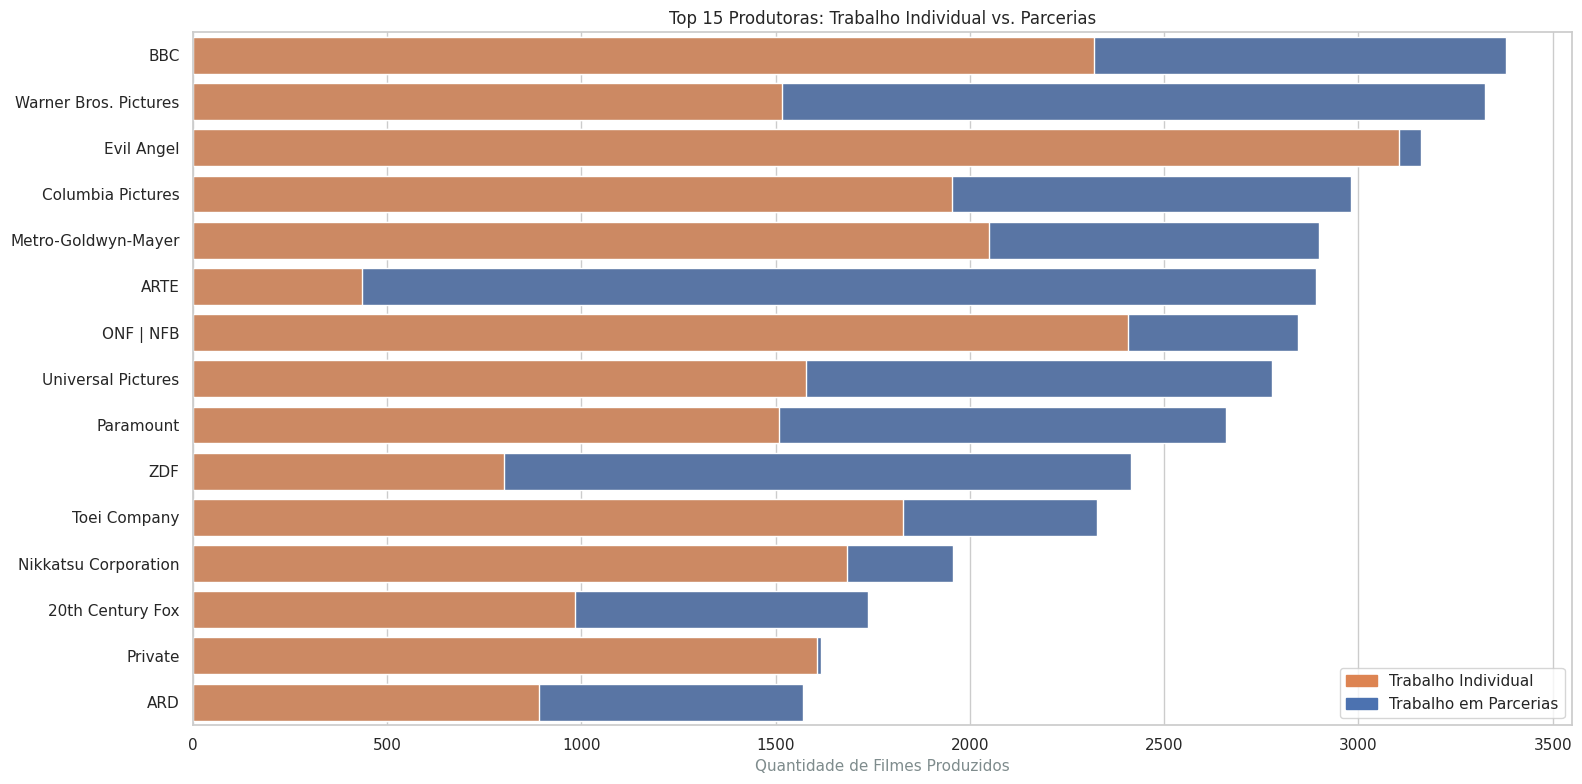

In [54]:
# Análise Comparativa: Trabalho Individual vs. Parcerias nas Top 15 Produtoras

#df = pd.read_csv('dados_brutos.csv', encoding='utf-8')
df = df.dropna(subset=['production_companies'])


# Calcular o TOTAL de aparições (Geral)
total_counts = df['production_companies'].str.split(', ').explode().value_counts()

# Calcular o valor INDIVIDUAL (Solo)
solo_movies = df[~df['production_companies'].str.contains(',')]
solo_counts = solo_movies['production_companies'].value_counts()

# Top 15 produtoras
top_15 = total_counts.head(15).index

df_plot = pd.DataFrame({
    'Produtora': top_15,
    'Total': total_counts[top_15].values,
    'Individual': solo_counts.reindex(top_15, fill_value=0).values
})

df_plot = df_plot.sort_values('Total', ascending=False)

# Plotagem (sobrepor barras)

plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

# 1. Camada de Fundo (TOTAL)
sns.barplot(
    data=df_plot, 
    x='Total', 
    y='Produtora', 
    color='#4c72b0',
    label='Trabalho em Parcerias',
    edgecolor='white'
)

# 2. Camada da Frente (INDIVIDUAL)
sns.barplot(
    data=df_plot, 
    x='Individual', 
    y='Produtora', 
    color='#dd8452',
    label='Trabalho Individual',
    edgecolor='white'
)

plt.title('Top 15 Produtoras: Trabalho Individual vs. Parcerias')
plt.xlabel('Quantidade de Filmes Produzidos', fontsize=11, color='#7f8c8d')
plt.ylabel('')

top_bar = mpatches.Patch(color='#dd8452', label='Trabalho Individual')
bottom_bar = mpatches.Patch(color='#4c72b0', label='Trabalho em Parcerias')
plt.legend(handles=[top_bar, bottom_bar], loc='lower right', frameon=True)

plt.tight_layout()
plt.show()

### 6.3 Análise da Receita por Quantidade de Produtoras

O objetivo é verificar se o número de produtoras impacta o sucesso financeiro do filme. Para evitar distorções causadas por sucessos isolados (outliers), focaremos na mediana da receita, buscando entender qual é o retorno financeiro mais realista e típico para cada cenário.

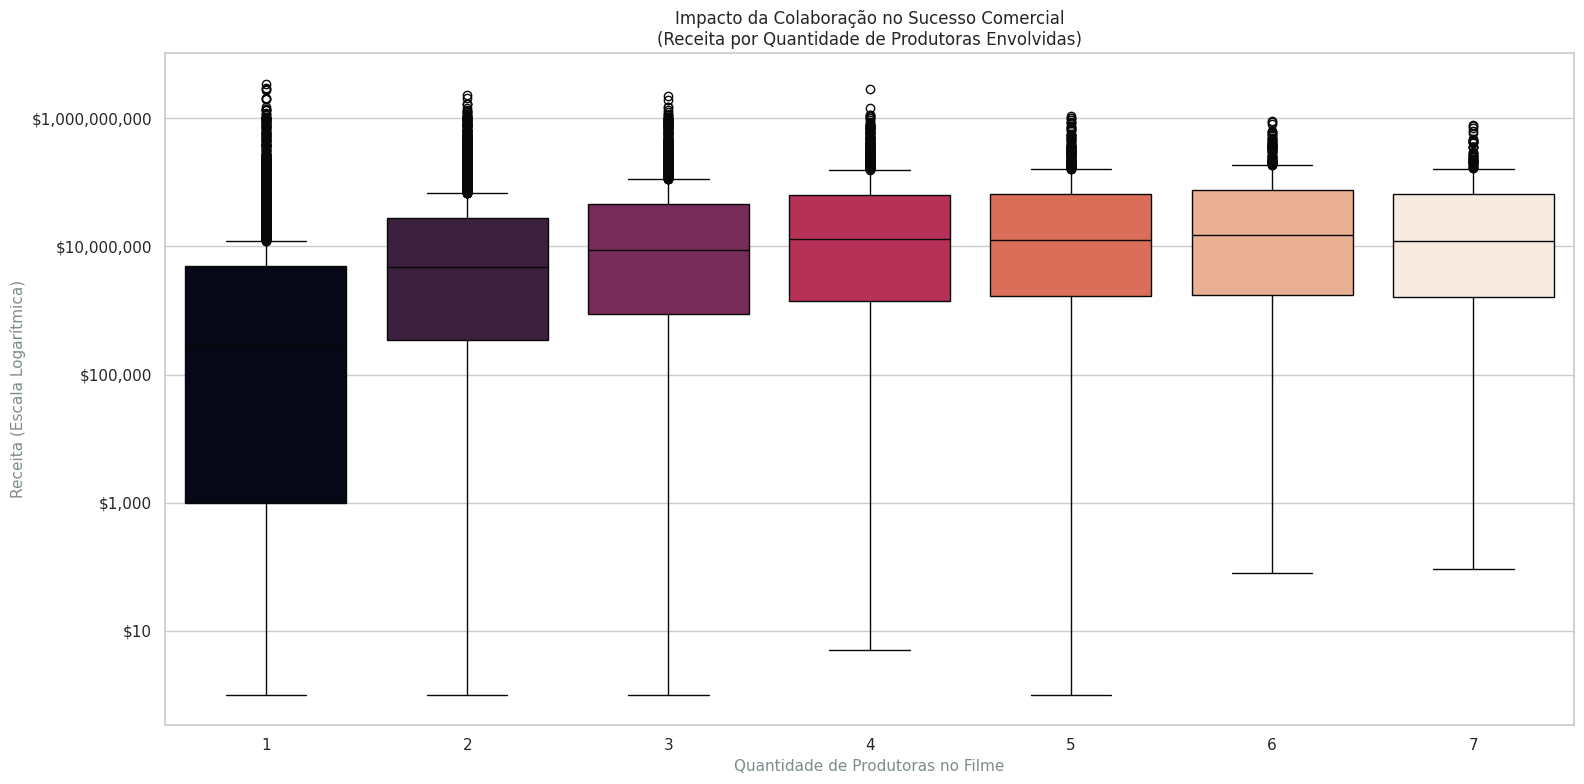

In [64]:
df['qtd_produtoras'] = df['production_companies'].fillna('a').apply(lambda x: len(str(x).split(',')))

df_financeiro = df[
    (df['qtd_produtoras'] <= 7) &
    (df['revenue'] > 0) 
]

plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=df_financeiro,
    x='qtd_produtoras',
    y='revenue',
    palette='rocket',
    hue='qtd_produtoras',
    legend=False
)

ax.set_yscale("log")

# Títulos e Labels
ax.set_title('Impacto da Colaboração no Sucesso Comercial\n(Receita por Quantidade de Produtoras Envolvidas)')
ax.set_xlabel('Quantidade de Produtoras no Filme', fontsize=11, color='#7f8c8d')
ax.set_ylabel('Receita (Escala Logarítmica)', fontsize=11, color='#7f8c8d')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '${:,.0f}'.format(y)))

plt.tight_layout()
plt.show()

### 6.4 Top 15 Gêneros por Receita Total

Este gráfico apresenta Top 15 Gêneros por Receita Total, facilitando a leitura de padrões e comparações relevantes.


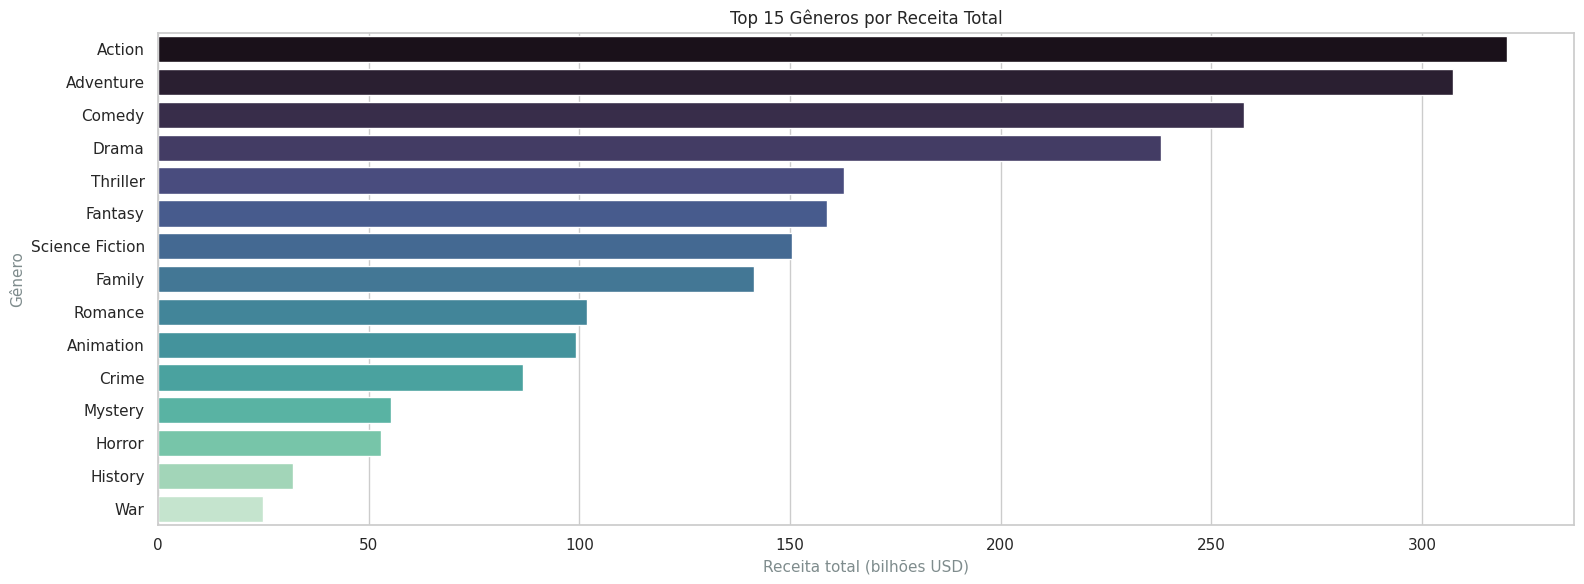

In [73]:
# Top 15 gêneros por receita total

df_gen = df[df["genres"].notna() & (df["revenue"] > 0)][["genres", "revenue"]].copy()
df_gen = df_gen.assign(genre=df_gen["genres"].str.split(", ")).explode("genre")
df_gen["genre"] = df_gen["genre"].str.strip()
df_gen = df_gen[(df_gen["genre"] != "") & (df_gen["genre"] != "nan")]

genre_revenue = df_gen.groupby("genre")["revenue"].sum().nlargest(15).reset_index()
genre_revenue["revenue_bi"] = genre_revenue["revenue"] / 1e9

plt.figure(figsize=(16, 6))

sns.barplot(
    data=genre_revenue, 
    x="revenue_bi", 
    y="genre", 
    color="#4C78A8", 
    hue="genre",
    palette="mako",
    legend=False)

plt.xlabel("Receita total (bilhões USD)", fontsize=11, color='#7f8c8d')
plt.ylabel("Gênero", fontsize=11, color='#7f8c8d')
plt.title("Top 15 Gêneros por Receita Total")

plt.tight_layout()
plt.show()


### 6.5 Top 15 Países Produtores (por volume)

Este gráfico apresenta Top 15 Países Produtores (por volume), facilitando a leitura de padrões e comparações relevantes.


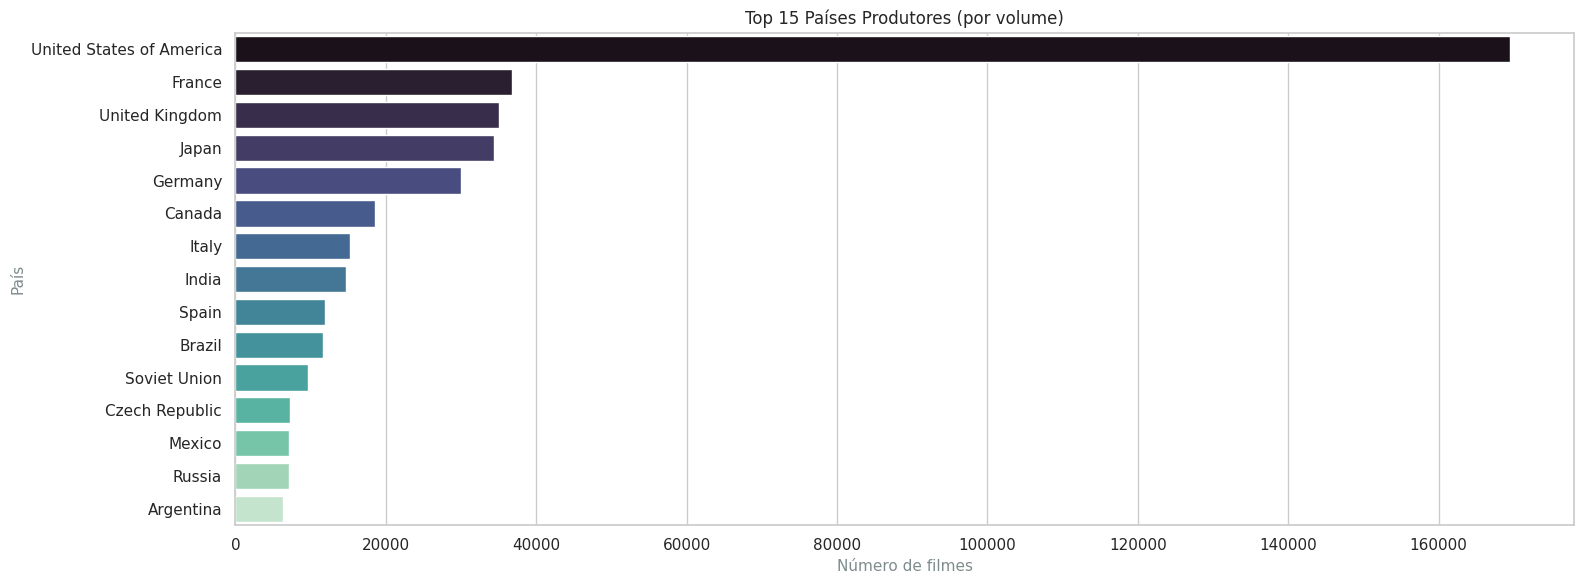

In [76]:
# Top 15 países produtores (por volume)

df_country = df[df["production_countries"].notna()][["production_countries"]].copy()
df_country = df_country.assign(country=df_country["production_countries"].str.split(", ")).explode("country")
df_country["country"] = df_country["country"].str.strip()
df_country = df_country[(df_country["country"] != "") & (df_country["country"] != "nan")]

country_counts = df_country["country"].value_counts().head(15).reset_index()
country_counts.columns = ["country", "count"]

plt.figure(figsize=(16, 6))

sns.barplot(data=country_counts, x="count", y="country", hue="country", palette="mako", legend=False)
plt.xlabel("Número de filmes", fontsize=11, color='#7f8c8d')
plt.ylabel("País", fontsize=11, color='#7f8c8d')
plt.title("Top 15 Países Produtores (por volume)")

plt.tight_layout()
plt.show()


### 6.6 Correlação entre Variáveis Financeiras e Popularidade
O gráfico busca verificar se há relação entre variáveis de popularidade com o investimento e/ou o lucro gerado pelo filme. 

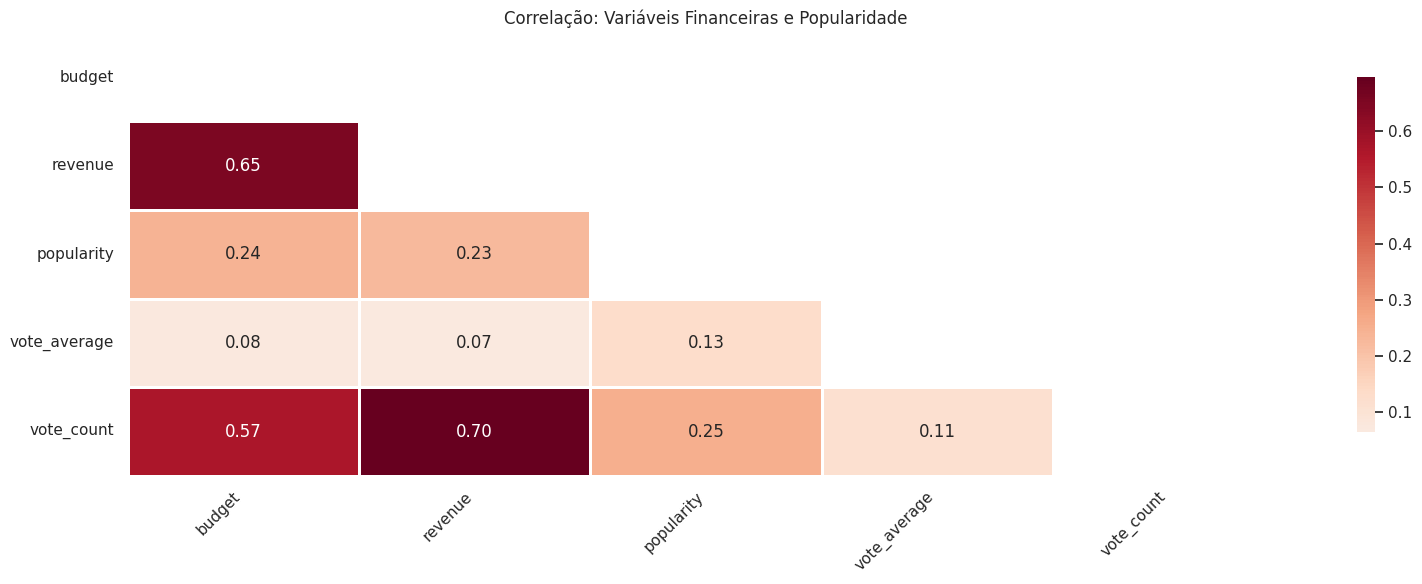

In [80]:
cols_fin = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']
corr_matrix = df[cols_fin].corr()

# Esconder a metade superior (triângulo redundante)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.set_theme(style="white")
plt.figure(figsize=(16, 6))

# Heatmap refinado
ax = sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    cmap='RdBu_r',       
    fmt=".2f", 
    center=0,           
    linewidths=1, 
    cbar_kws={"shrink": .8},
    square=False
)

plt.title('Correlação: Variáveis Financeiras e Popularidade')

# Ajuste fino das etiquetas dos eixos
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### 6.7 Duração x Popularidade

Este gráfico apresenta a relação entre a duração dos filmes (runtime) e sua pontuação de popularidade (popularity). Cada ponto representa um filme do dataset, permitindo identificar padrões gerais e a presença de valores atípicos. Observa-se que a maioria dos filmes se concentra em durações médias, enquanto alguns títulos com tempo de exibição muito elevado ou muito reduzido se destacam como outliers. A visualização também possibilita analisar se filmes mais longos tendem, ou não, a apresentar maior popularidade junto ao público.

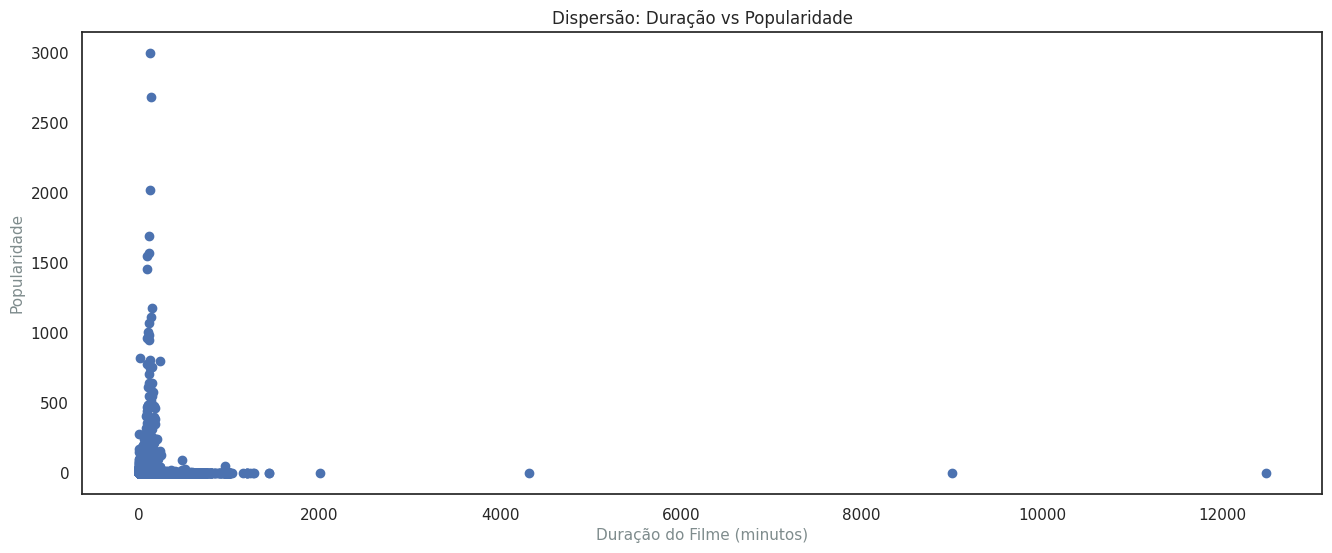

Top 10 filmes com maior pontuação de popularidade:
                                                   title  runtime  popularity
3871                                         Blue Beetle      128    2994.357
5051                                        Gran Turismo      135    2680.593
50973  A Female Boss with Big Tits and Her Cherry Boy...      120    2020.286
7930                                          The Nun II      110    1692.778
2130                                   Meg 2: The Trench      116    1567.273
9940                                         Retribution       91    1547.220
4016                                          Talk to Me       95    1458.514
1110                                              Fast X      142    1175.267
6394                                    Sound of Freedom      131    1111.036
825                                               Barbie      114    1069.340

Top 10 filmes maior duração:
                                                     title  r

In [ ]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df_limpo = df.dropna(subset=['runtime', 'popularity'])

# Gráfico de dispersão
plt.figure(figsize=(16, 6))
plt.scatter(df_limpo['runtime'], df_limpo['popularity'])
plt.title('Dispersão: Duração vs Popularidade')
plt.xlabel('Duração do Filme (minutos)', fontsize=11, color='#7f8c8d')
plt.ylabel('Popularidade', fontsize=11, color='#7f8c8d')
plt.show()

# Define rankings
popularityRank = df.sort_values(by='popularity', ascending=False).head(10)
runtimeRank = df.sort_values(by='runtime', ascending=False).head(10)

# Selecionar colunas relevantes
resultado = popularityRank[['title', 'runtime', 'popularity']]

print("Top 10 filmes com maior pontuação de popularidade:")
print(resultado)

resultado = runtimeRank[['title', 'runtime', 'popularity']]
print("\nTop 10 filmes maior duração:")
print(resultado)


## 7. Análise Financeira

### 7.1 Heatmap de ROI médio por década e gênero (top 8)
Este gráfico apresenta Heatmap de ROI médio por década e gênero (top 8), facilitando a leitura de padrões e comparações relevantes.

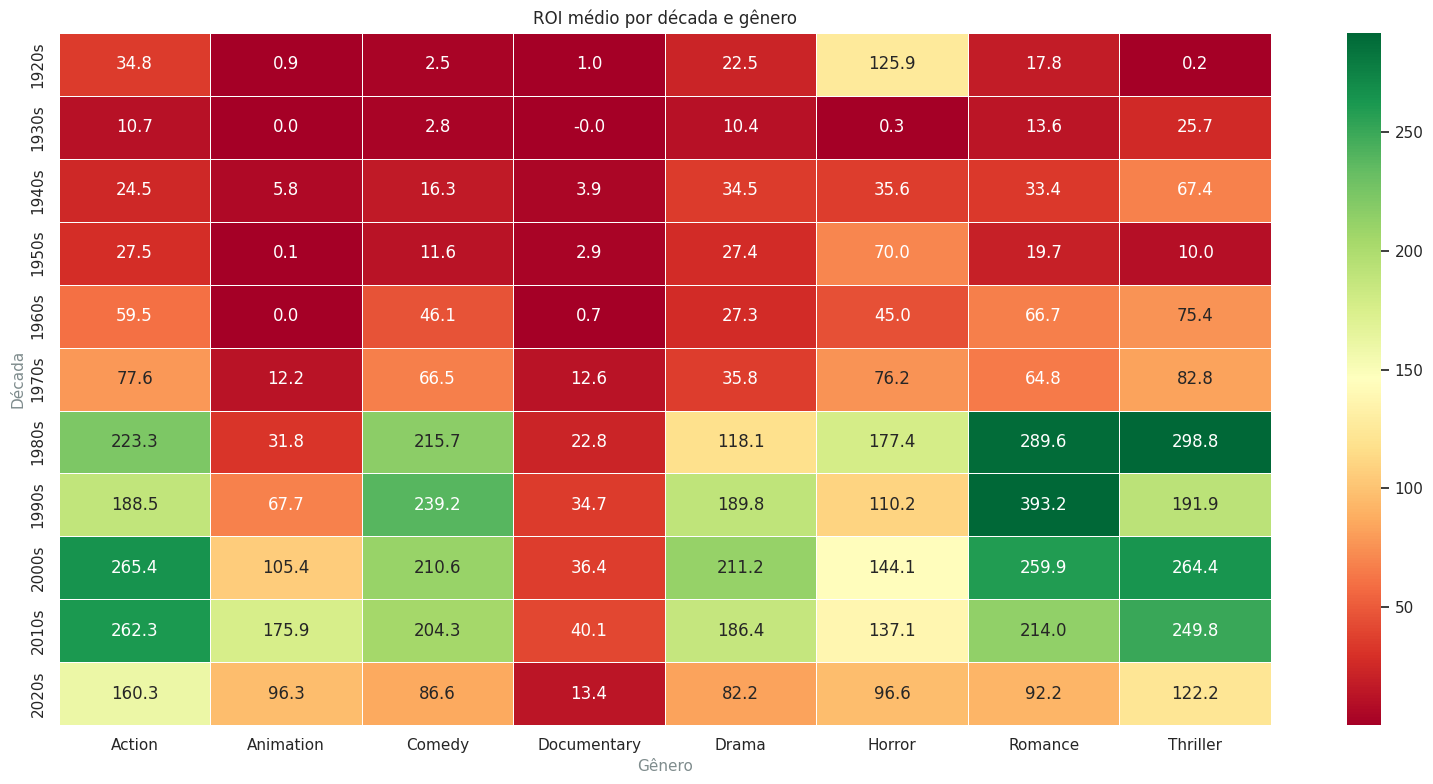

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year
df['roi'] = (df['revenue'] - df['budget']) / df['budget'].replace(0, 1)

# Filtra de 1920 até o fim da década de 2020
df = df[(df['year'] >= 1920) & (df['year'] <= 2024)].copy()
df['decade'] = (df['year'] // 10 * 10).fillna(0).astype(int).astype(str)

roi_cap_99 = df['roi'].quantile(0.99)
df_gen_roi = df[df["genres"].notna()][["genres", "roi", "decade"]].copy()
df_gen_roi["roi"] = df_gen_roi["roi"].clip(upper=roi_cap_99)

df_gen_roi = df_gen_roi.assign(genre=df_gen_roi["genres"].str.split(", ")).explode("genre")
df_gen_roi["genre"] = df_gen_roi["genre"].str.strip()
df_gen_roi = df_gen_roi[df_gen_roi["genre"] != ""]

top_genres = df_gen_roi["genre"].value_counts().head(8).index
pivot_gen = df_gen_roi[df_gen_roi["genre"].isin(top_genres)].groupby(["decade", "genre"])["roi"].mean().unstack()
pivot_gen = pivot_gen.sort_index()

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_gen, cmap="RdYlGn", annot=True, fmt=".1f", linewidths=0.5, robust=True)

plt.title("ROI médio por década e gênero",)
plt.xlabel("Gênero", fontsize=11, color='#7f8c8d')
plt.ylabel("Década", fontsize=11, color='#7f8c8d')

plt.tight_layout()
plt.show()

### 7.2 Orçamento vs Lucro

Este gráfico apresenta Orçamento vs Lucro, facilitando a leitura de padrões e comparações relevantes.

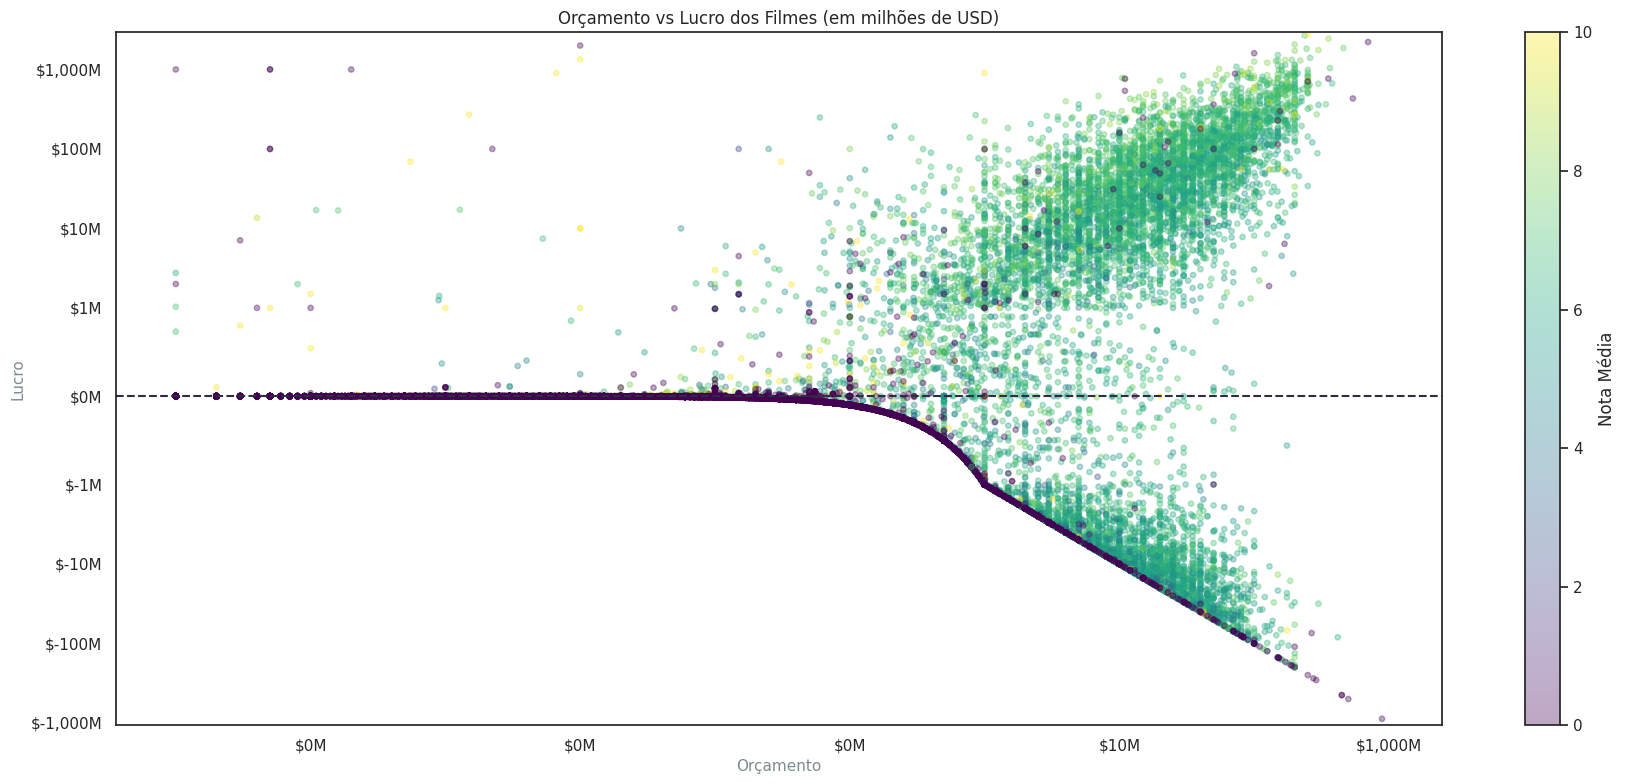

In [89]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['profit'] = df['revenue'] - df['budget']
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce').fillna(0)

df_plot = df[df['budget'] > 0].copy()
if len(df_plot) > 50000:
    df_plot = df_plot.sample(50000, random_state=42)

plt.figure(figsize=(18, 8))
sc = plt.scatter(df_plot["budget"] / 1e6, df_plot["profit"] / 1e6,
                 alpha=0.35, s=15, c=df_plot["vote_average"], cmap="viridis")

plt.colorbar(sc, label="Nota Média")
plt.xscale("log")
plt.yscale("symlog", linthresh=1)
plt.axhline(0, color="#2B2D42", linestyle="--", linewidth=1.5)

# formatar log e symlog em USD
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '${:,.0f}M'.format(y)))

plt.xlabel("Orçamento", fontsize=11, color='#7f8c8d')
plt.ylabel("Lucro", fontsize=11, color='#7f8c8d')
plt.title("Orçamento vs Lucro dos Filmes (em milhões de USD)")


plt.tight_layout()
plt.show()